# Análisando os acessos do LCC-2

Com mais dados de logs do laboratório mais utilizado pelos alunos de Ciência da Computação, foi feita uma análise simples a fim de identificar padrões e comportamentos não comuns nos hábitos de uso.

## Bibliotecas e Funções Complementares

Para explorar os dados, foram utilizadas bibliotecas populares em Ciência de Dados com Python e foram contruídas funções simples para ajudar no tratamento dos dados e extração de features.


In [1]:
# -*- coding: utf-8 -*-
"""
Análise dos LCCs

Amanda V. A. de Luna e Costa
Lívia Calvalcanti Juliao

"""
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Função para pegar o turno do acesso
def pega_turno(num):
    if(num <= 12):
        return "manha"
    elif(num > 12) and (num < 18):
        return "tarde"
    else:
        return "noite"
  
# Função para pegar o intervalo do acesso    
def pega_intervalo(num):
    if(num < 8):
        return "06h-08h"
    elif(num >= 8 and num < 10):
        return "08h-10h"
    elif(num >= 10 and num < 12):
        return "10h-12h"
    elif(num >= 12 and num < 14):
        return "12h-14h"
    elif(num >= 14 and num < 16):
        return "14h-16h"
    elif(num >= 16 and num < 18):
        return "16h-18h"
    else:
        return "18h+"
 
# Função para pegar o dia da semana
def pega_dia(data):
    data = dt.datetime.strptime(data, '%d/%m/%Y')
    dias = ["Seg","Ter","Qua","Qui","Sex","Sab","Dom"]
    dia_semana = dias[data.weekday()]
    return dia_semana


In [3]:
def z_mod(x, media,mad):
    m = (x - media) * 0.6745
    z_md = abs(m/mad)
    return float(z_md)

## Tratando os dados

In [4]:
# Lendo o data frame
df = pd.read_csv("../data/logs2.csv",sep = ";")
df.head()

data      hora  maquina              usuario
0  26/01/2016  15:21:01  lcc2-28  2396499187178686315
1  26/01/2016  15:21:04  lcc2-29  2396499187178686315
2  26/01/2016  15:30:39  lcc2-26  8842212669098742675
3  26/01/2016  15:30:55  lcc2-39  2396499187178686315
4  26/01/2016  15:31:17  lcc2-13  8842212669098742675

In [5]:
#### Ajeitando o data frame ####

# Acrescentando as colunas ano, mês, dia e dia da semana
df["ano"] = df["data"].apply(lambda x:int(x[6:]))
df["mes"] = df["data"].apply(lambda x:int(x[3:5]))
df["dia"] = df["data"].apply(lambda x:int(x[:2]))
df["dia_da_semana"] = df["data"].apply(lambda x:pega_dia(x))


In [6]:
# Acrescentando as colunas de hora pura,turno e intervalo
df["hora_pura"] = df["hora"].apply(lambda x:int(x[:2]))
df["turno"] = df["hora_pura"].apply(lambda x:pega_turno(x))
df["intervalo"] = df["hora_pura"].apply(lambda x:pega_intervalo(x))


In [7]:
# Pegando o número da máquina, apenas
df["numero_maquina"] = df["maquina"].apply(lambda x:int(x[5:]))


In [8]:
# Pegar apenas o último usuário de cada célula da coluna usuário
df["usuario"] = df["usuario"].apply(lambda x:x.split(","))
df["usuario"] = df["usuario"].apply(lambda x:x[-1])



In [9]:
# df.to_csv("../data/acessosTratados.csv",sep=";")
df.head()

data      hora  maquina              usuario   ano  mes  dia  \
0  26/01/2016  15:21:01  lcc2-28  2396499187178686315  2016    1   26   
1  26/01/2016  15:21:04  lcc2-29  2396499187178686315  2016    1   26   
2  26/01/2016  15:30:39  lcc2-26  8842212669098742675  2016    1   26   
3  26/01/2016  15:30:55  lcc2-39  2396499187178686315  2016    1   26   
4  26/01/2016  15:31:17  lcc2-13  8842212669098742675  2016    1   26   

  dia_da_semana  hora_pura  turno intervalo  numero_maquina  
0           Ter         15  tarde   14h-16h              28  
1           Ter         15  tarde   14h-16h              29  
2           Ter         15  tarde   14h-16h              26  
3           Ter         15  tarde   14h-16h              39  
4           Ter         15  tarde   14h-16h              13

## Análise
A análise foi feita através de gráficos para facilitar a leitura das informações. Foram feitos vários grupos para responder questões pertinentes a número de acessos em relação ao dia da semana, hora, mês, turno e dia do mês.

### Gráficos iniciais

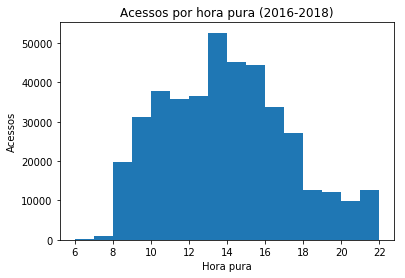

In [10]:
# Plotando a hora pura de todos os anos
plt.title("Acessos por hora pura (2016-2018)")
plt.xlabel("Hora pura")
plt.ylabel("Acessos")
x = [i for i in range(6,23)]
plt.hist(df["hora_pura"],bins = x)
plt.show()

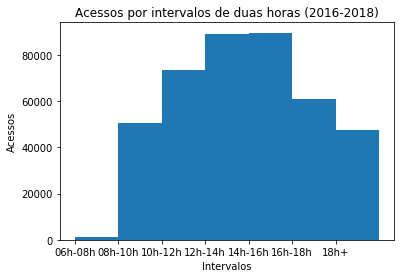

In [11]:
# Plotando o intervalo de horas de todos os anos
plt.title("Acessos por intervalos de duas horas (2016-2018)")
plt.xlabel("Intervalos")
plt.ylabel("Acessos")
x = [i for i in range(8)] 
plt.hist(df["intervalo"],bins = x)
plt.show()

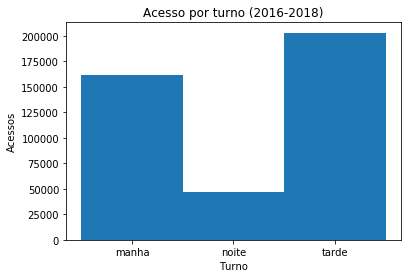

In [12]:
# Plotando o turno de todos os anos
plt.title("Acesso por turno (2016-2018)")
plt.xlabel("Turno")
plt.ylabel("Acessos")
x = [i for i in range(4)]
plt.hist(df["turno"], bins = x,align = "left")
plt.show()

### Análise dos acessos à noite

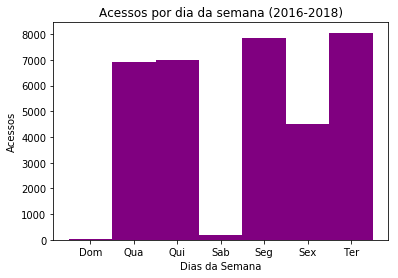

In [13]:
# Definição do data frame de acessos à noite
acessos_noite = df.loc[df["hora_pura"]>18]

# plot dias da semana noturnos
plt.title("Acessos por dia da semana (2016-2018)")
plt.xlabel("Dias da Semana")
plt.ylabel("Acessos")
x = [i for i in range(8)]
plt.hist(acessos_noite["dia_da_semana"], bins = x, align = "left",color = "purple")
plt.show()


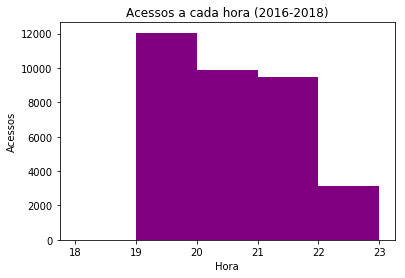

In [14]:
# plot das horas acessadas à noite
plt.title("Acessos a cada hora (2016-2018)")
plt.xlabel("Hora")
plt.ylabel("Acessos")
x = [i for i in range(18,24)]
plt.hist(acessos_noite["hora_pura"],bins = x,color = "purple")
plt.show()

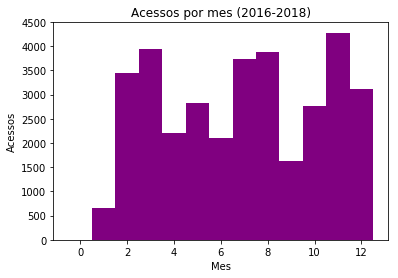

In [15]:
# plot mes noite
plt.title("Acessos por mes (2016-2018)")
plt.xlabel("Mes")
plt.ylabel("Acessos")
x = [i for i in range(14)]
plt.hist(acessos_noite["mes"], bins = x, align = "left",color = "purple")
plt.show()


In [16]:
# quantidade de acessos à noite por usuario
acessos_noite[["usuario"]].apply(pd.value_counts)

usuario
710203151364569887        961
3952875937242617029       939
-8964805488632447931      887
-8029875674051901993      831
4010185481155475087       828
616329888599911591        791
7995863693106437687       720
-818095743421438535       520
8622081858837413831       441
260012301744219973        434
6790375887576350655       429
8890326217915670087       407
-7985721906146581617      393
7374745637866236271       363
3628039033459672679       348
-5945516227690438481      324
5214110664429018995       286
-7526644742279187571      280
-5327471277975722523      280
-6408941110268116721      276
-7994420641407581993      274
-4162539475660138117      271
-7823966406330472873      267
-7548620409216467497      265
2100109286811902115       260
-6900267855720317189      260
4936868219300984647       240
-6306053349347612821      238
8599754207183567627       227
1244840843434056831       226
...                       ...
-732796747685867021         7
-8741223625728197469        7
-7918907957709602193        7
4376634978432873059         7
8480036620164532527         7
-3839512206183447009        6
174533854835184583          6
-2544405543188522983        6
-807484466011095973         6
9209283833684251721         6
959392290432640243          5
-3122961089314409881        5
-5747290438078533929        5
-3557015035245925865        5
-2830551055657273477        5
-4108726612914554071        5
-5414664532305478585        5
-2376994620429681619        5
-4528124704711103313        5
-6842943814754757033        4
-5365542490186333045        4
3224635552473502933         3
4594016262859637085         3
-5627528762242252489        3
6024350611974675869         2
-4015152259331783011        2
2548894312276246951         2
-6019600205139912729        2
-4566258479426565893        1
-8747392275161436617        1

[463 rows x 1 columns]

In [17]:
# quantidade de acessos à noite em 2016 por usuário
acessos_noite2016 = acessos_noite.loc[acessos_noite["ano"] == 2016]
acessos_noite2016[["usuario"]].apply(pd.value_counts)


usuario
3952875937242617029       679
-8029875674051901993      573
6790375887576350655       397
8890326217915670087       347
260012301744219973        336
8622081858837413831       309
-818095743421438535       300
-7985721906146581617      287
4010185481155475087       267
-5945516227690438481      252
-8964805488632447931      240
-6306053349347612821      238
8599754207183567627       227
-7823966406330472873      196
-7180048872138838303      191
3628039033459672679       188
-4369209186747172513      187
-6408941110268116721      187
-3119048470145123191      164
8914949561969210791       160
2100109286811902115       160
-5832552258819232989      160
5214110664429018995       159
-3829900532284486707      151
710203151364569887        141
861307982693465343        137
7374745637866236271       127
8393220616651413271       123
-1506733151552952077      122
616329888599911591        121
...                       ...
3382539634577350789         7
4376634978432873059         7
-6433603906595265281        7
-732796747685867021         7
9209283833684251721         6
1140420612492407313         6
-3839512206183447009        6
-2544405543188522983        6
-807484466011095973         6
7268392441127890663         6
4356412262272732967         5
8258181393037226331         5
959392290432640243          5
-2830551055657273477        5
6195837111206121059         5
-4528124704711103313        5
-2376994620429681619        5
-3557015035245925865        5
2054157677090704225         5
-5747290438078533929        5
-5414664532305478585        5
8887448389501147133         5
-858434282386814081         4
-5365542490186333045        4
-5627528762242252489        3
-5931270350125989095        3
-4015152259331783011        2
2548894312276246951         2
6024350611974675869         2
-6019600205139912729        2

[309 rows x 1 columns]

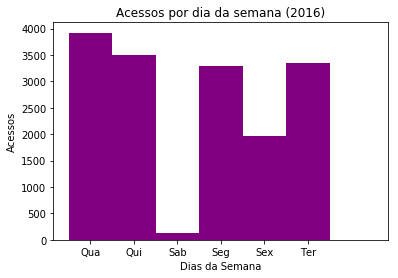

In [18]:
# plot de acessos à noite em 2016 por dia da semana
plt.title("Acessos por dia da semana (2016)")
plt.xlabel("Dias da Semana")
plt.ylabel("Acessos")
x = [i for i in range(8)]
plt.hist(acessos_noite2016["dia_da_semana"], bins = x, align = "left",color = "purple")
plt.show()

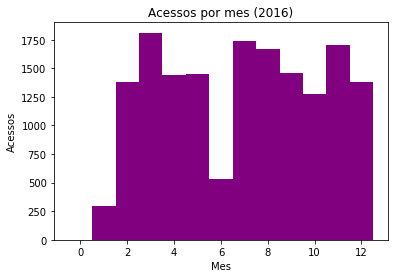

In [19]:
# plot de acessos à noite em 2016 por mes
plt.title("Acessos por mes (2016)")
plt.xlabel("Mes")
plt.ylabel("Acessos")
x = [i for i in range(14)]
plt.hist(acessos_noite2016["mes"], bins = x, align = "left",color = "purple")
plt.show()

In [20]:
# quantidade de acessos por usuario em 2016 à noite
acessos_noite2017 = acessos_noite.loc[acessos_noite["ano"] == 2017]
acessos_noite2017[["usuario"]].apply(pd.value_counts)

usuario
710203151364569887        740
-8964805488632447931      647
616329888599911591        590
7995863693106437687       560
4010185481155475087       541
3952875937242617029       260
-4162539475660138117      251
1244840843434056831       226
-5327471277975722523      220
-818095743421438535       220
-8029875674051901993      218
329711379293382035        200
4936868219300984647       200
7374745637866236271       196
-149989628072339977       193
-7526644742279187571      180
-1397364319370723833      180
-7994420641407581993      179
3851663166247601983       170
-7548620409216467497      170
-6356610120759153725      164
3628039033459672679       160
5682070817617030239       160
-6900267855720317189      160
6360606073874941599       147
-5176078910871406265      142
-6258236546331301655      140
-996052850327550937       138
8622081858837413831       132
5214110664429018995       127
...                       ...
4199266941560750021        20
4794299754757158903        20
8149903849058942745        19
-7964414160807724917       12
-1756400859312633849       12
6485817147049395433        12
-571275991269025545        12
7720781210703829651        11
676759993843957339         11
-1701646455387899837       10
-7033812076793093841       10
-8170963101911103005        8
-1178106220558975409        7
-23970452530721585          6
174533854835184583          6
4749216465940107747         6
8622783021608980995         6
444005608916122147          6
8887448389501147133         6
-7842241510165621037        6
-7219069687337176277        5
-4108726612914554071        5
-3122961089314409881        5
7988704663423377863         5
-6842943814754757033        4
4594016262859637085         3
3224635552473502933         3
4898627566655134015         2
-4566258479426565893        1
-8747392275161436617        1

[288 rows x 1 columns]

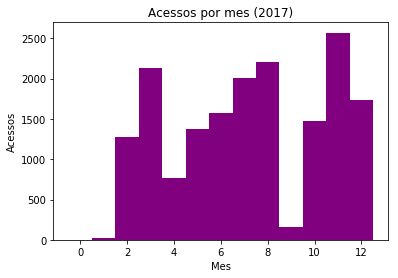

In [21]:
# plot acessos à noite por mes em 2017
plt.title("Acessos por mes (2017)")
plt.xlabel("Mes")
plt.ylabel("Acessos")
x = [i for i in range(14)]
plt.hist(acessos_noite2017["mes"], bins = x, align = "left",color = "purple")
plt.show()

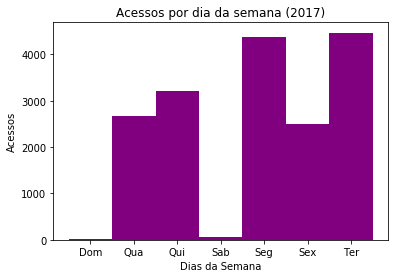

In [22]:
# plot acessos à noite por dia da semana em 2017
plt.title("Acessos por dia da semana (2017)")
plt.xlabel("Dias da Semana")
plt.ylabel("Acessos")
x = [i for i in range(8)]
plt.hist(acessos_noite2017["dia_da_semana"], bins = x, align = "left",color = "purple")
plt.show()

## Análise por ano

In [23]:
# Gerando o data frame do ano 2016
df2016 = df[df.ano == 2016]
df2016.head()

data      hora  maquina              usuario   ano  mes  dia  \
0  26/01/2016  15:21:01  lcc2-28  2396499187178686315  2016    1   26   
1  26/01/2016  15:21:04  lcc2-29  2396499187178686315  2016    1   26   
2  26/01/2016  15:30:39  lcc2-26  8842212669098742675  2016    1   26   
3  26/01/2016  15:30:55  lcc2-39  2396499187178686315  2016    1   26   
4  26/01/2016  15:31:17  lcc2-13  8842212669098742675  2016    1   26   

  dia_da_semana  hora_pura  turno intervalo  numero_maquina  
0           Ter         15  tarde   14h-16h              28  
1           Ter         15  tarde   14h-16h              29  
2           Ter         15  tarde   14h-16h              26  
3           Ter         15  tarde   14h-16h              39  
4           Ter         15  tarde   14h-16h              13

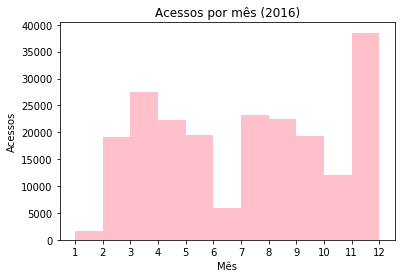

In [24]:
# Plotando acessos por mês (2016)

x = [i for i in range(1,13)]
plt.title("Acessos por mês (2016)")
plt.xlabel("Mês")
plt.ylabel("Acessos")
plt.hist(df2016["mes"], bins = x, color = "pink",align = "mid")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

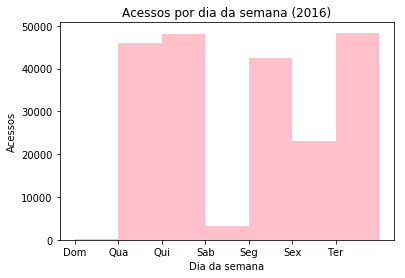

In [25]:
# Plotando acessos por dia da semana (2016)
x = [i for i in range(8)]
plt.title("Acessos por dia da semana (2016)")
plt.xlabel("Dia da semana")
plt.ylabel("Acessos")
plt.hist(df2016["dia_da_semana"], bins = x, color = "pink")
plt.show()

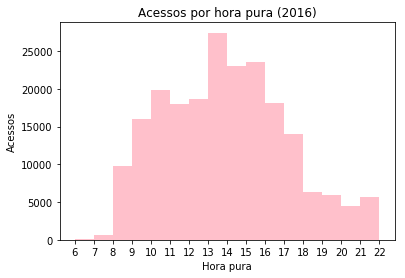

In [26]:
# Plotando acessos por hora pura (2016)
x = [i for i in range(6,23)]
plt.title("Acessos por hora pura (2016)")
plt.xlabel("Hora pura")
plt.ylabel("Acessos")
plt.hist(df2016["hora_pura"], bins = x, color = "pink")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

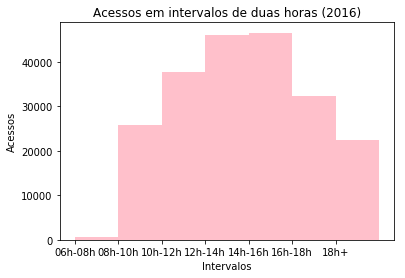

In [27]:
# Plotando acessos por intervalos de duas horas (2016)
x = [i for i in range(8)]
plt.title("Acessos em intervalos de duas horas (2016)")
plt.xlabel("Intervalos")
plt.ylabel("Acessos")
plt.hist(df2016["intervalo"], bins = x, color = "pink")
plt.show()

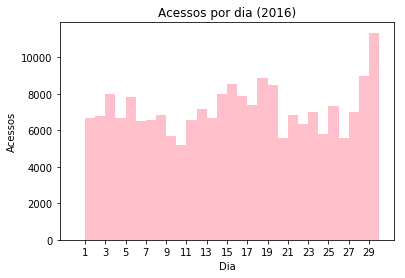

In [28]:
# Plotando acessos por dia (2016)
x = [i for i in range(31)]
plt.title("Acessos por dia (2016)")
plt.xlabel("Dia")
plt.ylabel("Acessos")
plt.hist(df2016["dia"],bins = x, color = "pink")
plt.xticks(np.arange(min(x)+1, max(x)+1, 2.0))
plt.show()

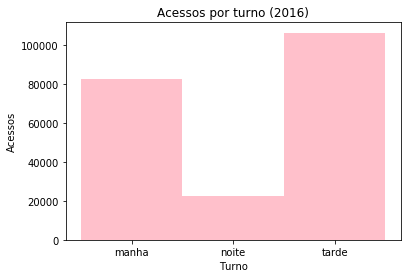

In [29]:
# Plotando acessos por turno (2016)
x = [i for i in range(4)]
plt.title("Acessos por turno (2016)")
plt.xlabel("Turno")
plt.ylabel("Acessos")
plt.hist(df2016["turno"], bins = x, color = "pink",align = "left")
plt.show()

### 2017

In [30]:
# Gerando o data frame do ano 2017
df2017 = df[df.ano == 2017]
df2017.head()

data      hora  maquina               usuario   ano  mes  dia  \
211469  30/01/2017  14:10:10  lcc2-34  -8535823525059948413  2017    1   30   
211470  30/01/2017  14:10:16  lcc2-21    -85292856343897665  2017    1   30   
211471  30/01/2017  14:10:31  lcc2-25   4010185481155475087  2017    1   30   
211472  30/01/2017  14:10:34  lcc2-32   1027583428837321219  2017    1   30   
211473  30/01/2017  14:10:40  lcc2-19  -2747962790275463847  2017    1   30   

       dia_da_semana  hora_pura  turno intervalo  numero_maquina  
211469           Seg         14  tarde   14h-16h              34  
211470           Seg         14  tarde   14h-16h              21  
211471           Seg         14  tarde   14h-16h              25  
211472           Seg         14  tarde   14h-16h              32  
211473           Seg         14  tarde   14h-16h              19

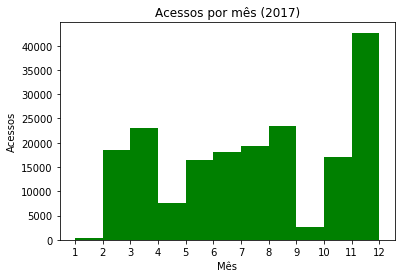

In [31]:
# Plotando acessos por mês (2017)

x = [i for i in range(1,13)]
plt.title("Acessos por mês (2017)")
plt.xlabel("Mês")
plt.ylabel("Acessos")
plt.hist(df2017["mes"], bins = x, color = "green",align = "mid")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

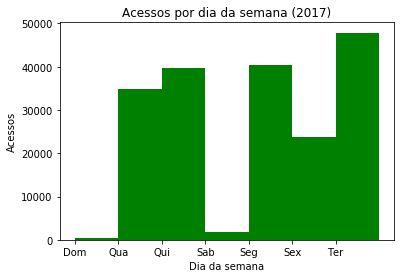

In [32]:
# Plotando acessos por dia da semana (2017)
x = [i for i in range(8)]
plt.title("Acessos por dia da semana (2017)")
plt.xlabel("Dia da semana")
plt.ylabel("Acessos")
plt.hist(df2017["dia_da_semana"], bins = x, color = "green")
plt.show()

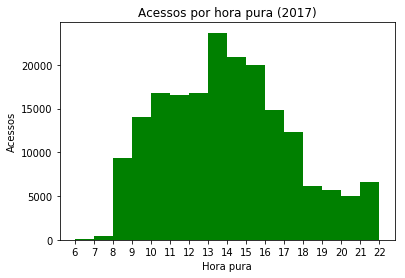

In [33]:
# Plotando acessos por hora pura (2017)
x = [i for i in range(6,23)]
plt.title("Acessos por hora pura (2017)")
plt.xlabel("Hora pura")
plt.ylabel("Acessos")
plt.hist(df2017["hora_pura"], bins = x, color = "green")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

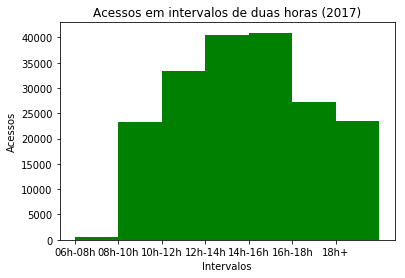

In [34]:
# Plotando acessos por intervalos de duas horas (2017)
x = [i for i in range(8)]
plt.title("Acessos em intervalos de duas horas (2017)")
plt.xlabel("Intervalos")
plt.ylabel("Acessos")
plt.hist(df2017["intervalo"], bins = x, color = "green")
plt.show()

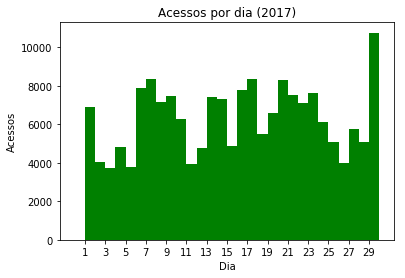

In [35]:
# Plotando acessos por dia (2017)
x = [i for i in range(31)]
plt.title("Acessos por dia (2017)")
plt.xlabel("Dia")
plt.ylabel("Acessos")
plt.hist(df2017["dia"],bins = x, color = "green")
plt.xticks(np.arange(min(x)+1, max(x)+1, 2.0))
plt.show()

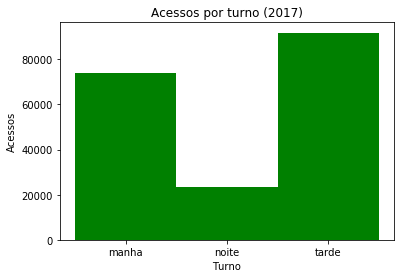

In [36]:
# Plotando acessos por turno (2017)
x = [i for i in range(4)]
plt.title("Acessos por turno (2017)")
plt.xlabel("Turno")
plt.ylabel("Acessos")
plt.hist(df2017["turno"], bins = x, color = "green",align = "left")
plt.show()

### 2018

In [37]:
# Gerando o dataframe de 2018
df2018 = df[df.ano == 2018]
df2018.head()

data      hora  maquina               usuario   ano  mes  dia  \
400612  29/01/2018  08:30:08  lcc2-23    710888610848933747  2018    1   29   
400613  29/01/2018  08:30:11  lcc2-34  -8640866648899195157  2018    1   29   
400614  29/01/2018  08:30:32  lcc2-25  -5571270527041432347  2018    1   29   
400615  29/01/2018  08:30:47  lcc2-31  -1343902712107414181  2018    1   29   
400616  29/01/2018  08:31:26  lcc2-13   7086245898261506355  2018    1   29   

       dia_da_semana  hora_pura  turno intervalo  numero_maquina  
400612           Seg          8  manha   08h-10h              23  
400613           Seg          8  manha   08h-10h              34  
400614           Seg          8  manha   08h-10h              25  
400615           Seg          8  manha   08h-10h              31  
400616           Seg          8  manha   08h-10h              13

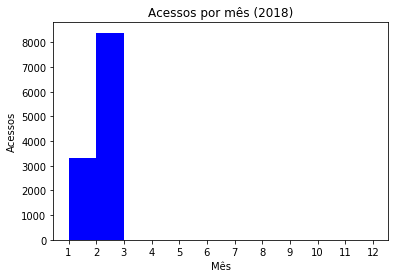

In [38]:
# Plotando acessos por mês (2018)

x = [i for i in range(1,13)]
plt.title("Acessos por mês (2018)")
plt.xlabel("Mês")
plt.ylabel("Acessos")
plt.hist(df2018["mes"], bins = x, color = "blue",align = "mid")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

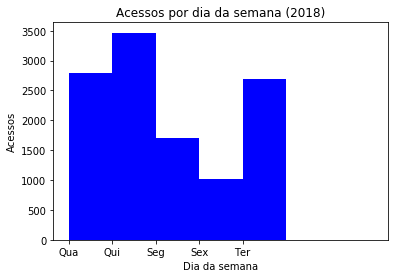

In [39]:
# Plotando acessos por dia da semana (2018)
x = [i for i in range(8)]
plt.title("Acessos por dia da semana (2018)")
plt.xlabel("Dia da semana")
plt.ylabel("Acessos")
plt.hist(df2018["dia_da_semana"], bins = x, color = "blue")
plt.show()

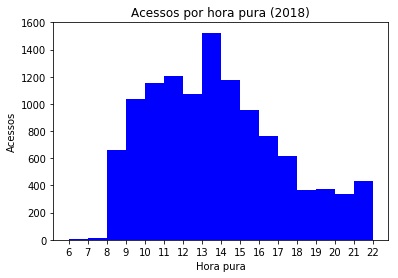

In [40]:
# Plotando acessos por hora pura (2018)
x = [i for i in range(6,23)]
plt.title("Acessos por hora pura (2018)")
plt.xlabel("Hora pura")
plt.ylabel("Acessos")
plt.hist(df2018["hora_pura"], bins = x, color = "blue")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

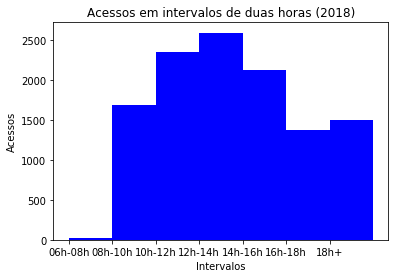

In [41]:
# Plotando acessos por intervalos de duas horas (2018)
x = [i for i in range(8)]
plt.title("Acessos em intervalos de duas horas (2018)")
plt.xlabel("Intervalos")
plt.ylabel("Acessos")
plt.hist(df2018["intervalo"], bins = x, color = "blue")
plt.show()

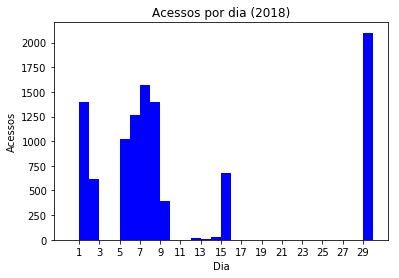

In [42]:
# Plotando acessos por dia (2018)
x = [i for i in range(31)]
plt.title("Acessos por dia (2018)")
plt.xlabel("Dia")
plt.ylabel("Acessos")
plt.hist(df2018["dia"],bins = x, color = "blue")
plt.xticks(np.arange(min(x)+1, max(x)+1, 2.0))
plt.show()

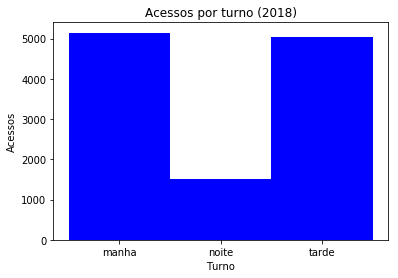

In [43]:
# Plotando acessos por turno (2018)
x = [i for i in range(4)]
plt.title("Acessos por turno (2018)")
plt.xlabel("Turno")
plt.ylabel("Acessos")
plt.hist(df2018["turno"], bins = x, color = "blue",align = "left")
plt.show()

### Análise dos meses de cada ano
A fim de tornar possível a comparação entre a análise anterior, feita em relação ao mês de Agosto de 2017, foram feitos os gráficos de cada mês dos dados que estão sendo estudados. Em geral, as mesmas questões foram expostas.

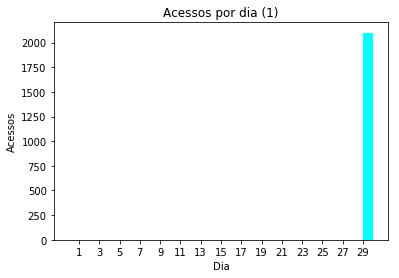

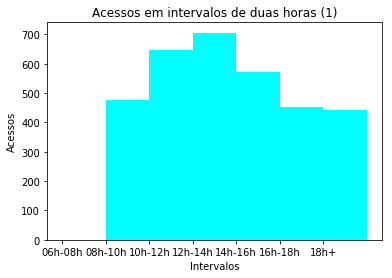

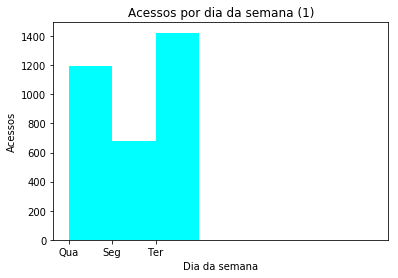

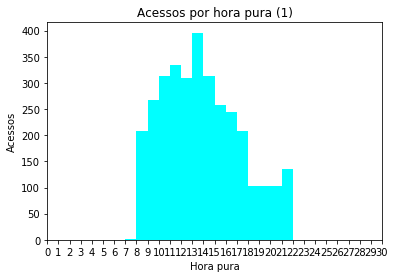

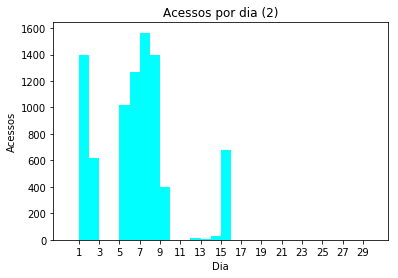

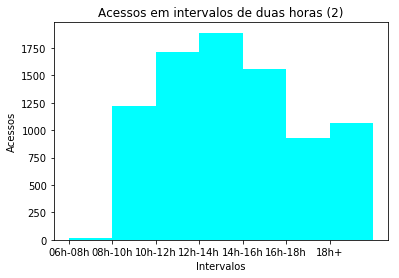

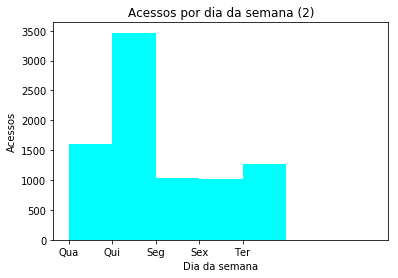

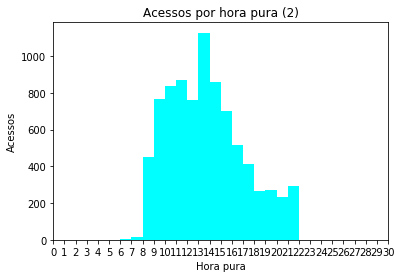

In [44]:
# arrays usados para fazer os graficos
# quantidade de dias no mes
x = [i for i in range(31)]
# dia da semana
a = [i for i in range(8)]
b = [k for k in range(8)]
c = [i for i in range(4)]
# meses do ano
e = [i for i in range(1,13)]
# horas consideradas para a avaliação
d = [i for i in range(6,23)]

# plots para os meses de jan e fev de 2018 
mes_atual = 1
for mes in range(2):
    # acessos de cada dia do mês
    plt.title("Acessos por dia ("+ str(mes_atual)+")")
    plt.xlabel("Dia")
    plt.ylabel("Acessos")
    plt.hist(df2018.loc[df2018["mes"] == mes_atual]["dia"],bins = x, color = "cyan")
    plt.xticks(np.arange(min(x)+1, max(x)+1, 2.0))
    plt.show()

    # acessos nos intervalos de hora que, geralmente, são destinados às aulas 
    plt.title("Acessos em intervalos de duas horas ("+ str(mes_atual)+")")
    plt.xlabel("Intervalos")
    plt.ylabel("Acessos")
    plt.hist(df2018.loc[df2018["mes"] == mes_atual]["intervalo"], bins = a, color = "cyan")
    plt.show()

    # acessos de domingo a sábado
    plt.title("Acessos por dia da semana ("+ str(mes_atual)+")")
    plt.xlabel("Dia da semana")
    plt.ylabel("Acessos")
    plt.hist(df2018.loc[df2018["mes"] == mes_atual]["dia_da_semana"], bins = b, color = "cyan")
    plt.show()

    # acessos a cada hora
    plt.title("Acessos por hora pura ("+ str(mes_atual)+")")
    plt.xlabel("Hora pura")
    plt.ylabel("Acessos")
    plt.hist(df2018.loc[df2018["mes"] == mes_atual]["hora_pura"], bins = d, color = "cyan")
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.show()

    mes_atual = mes_atual + 1
    
    


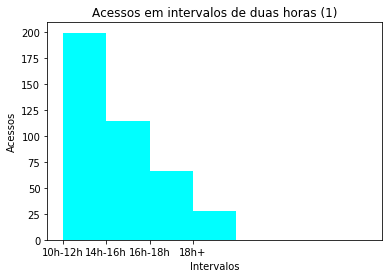

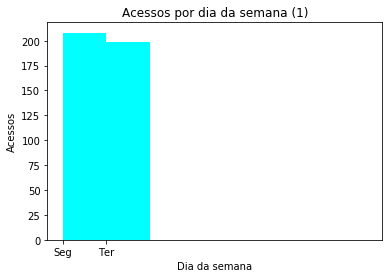

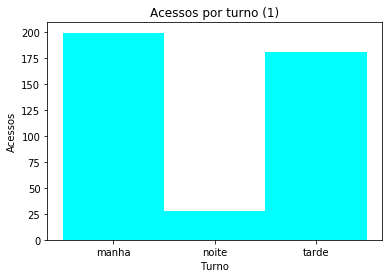

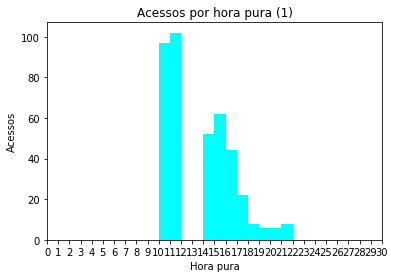

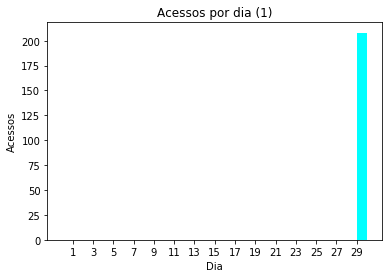

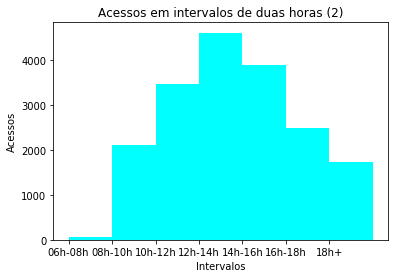

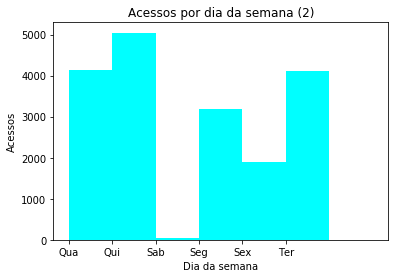

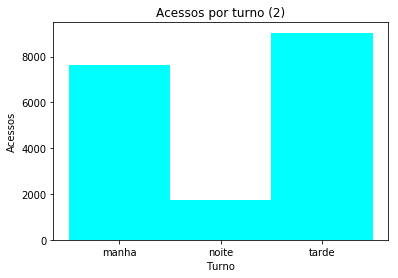

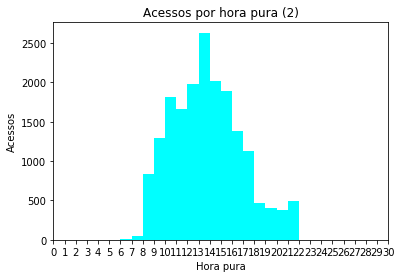

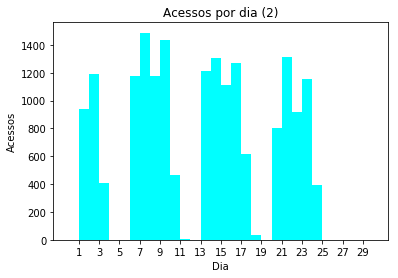

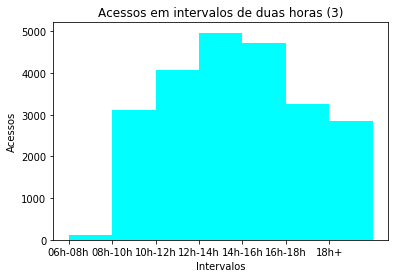

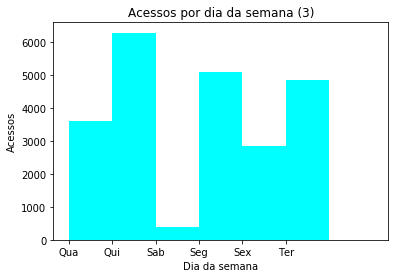

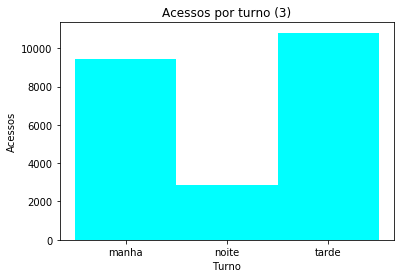

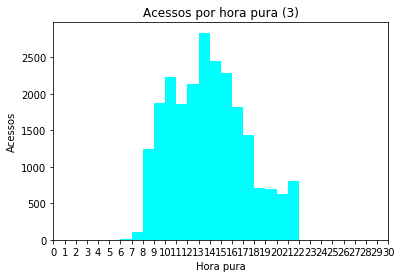

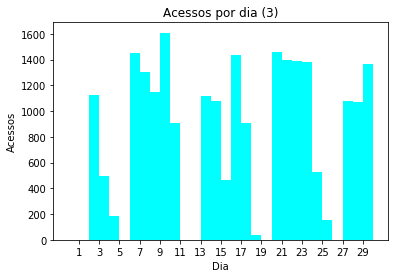

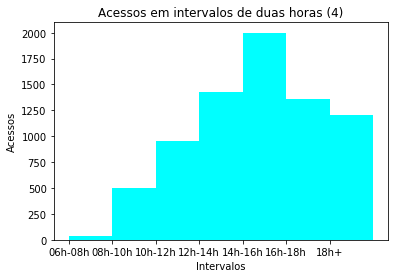

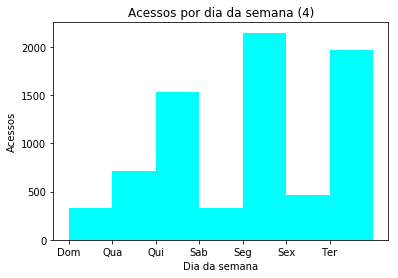

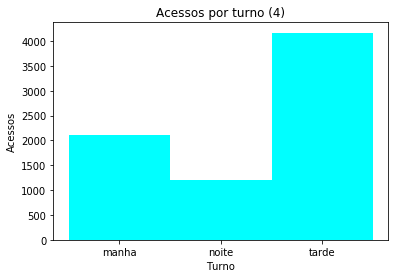

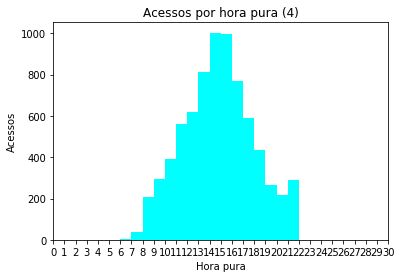

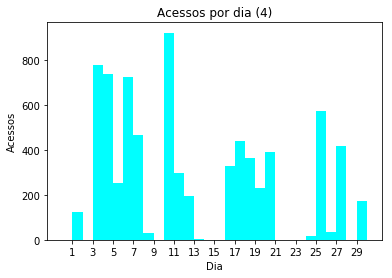

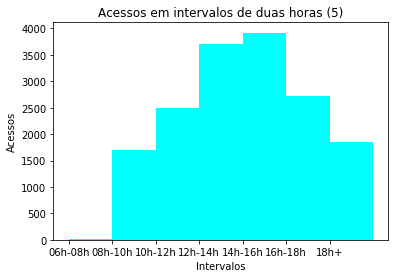

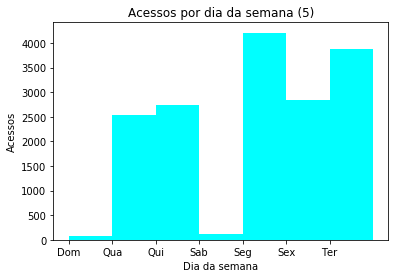

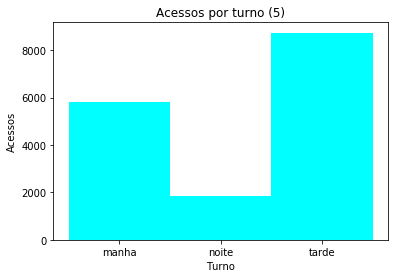

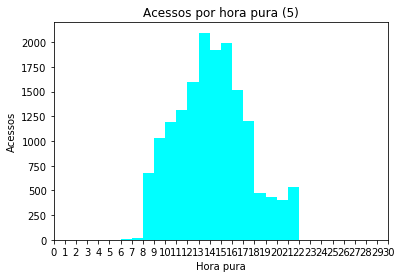

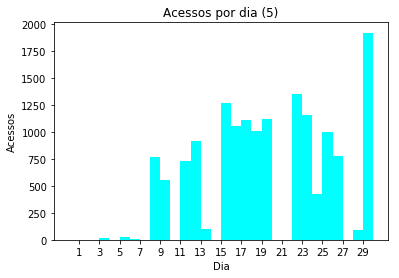

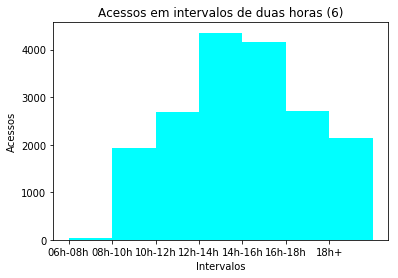

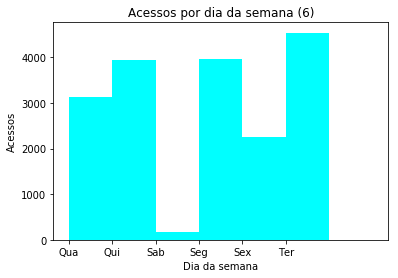

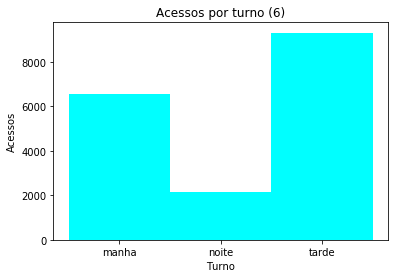

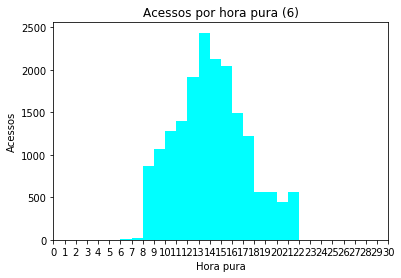

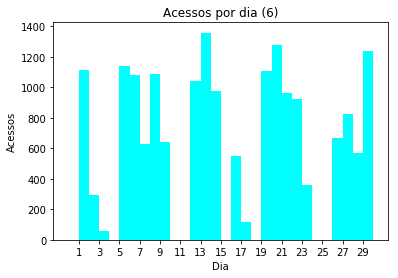

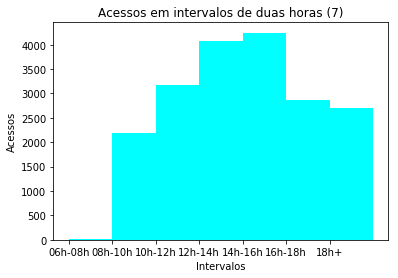

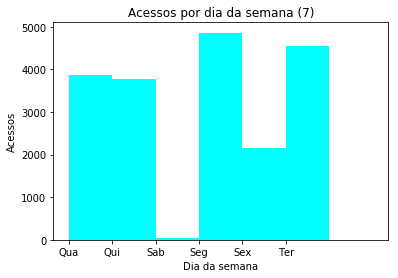

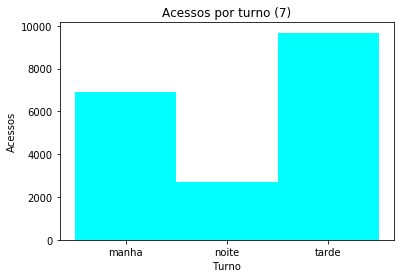

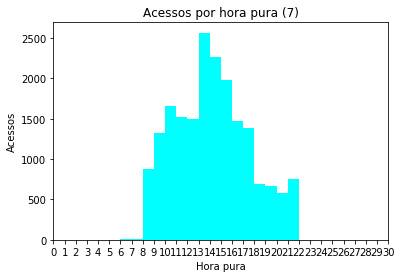

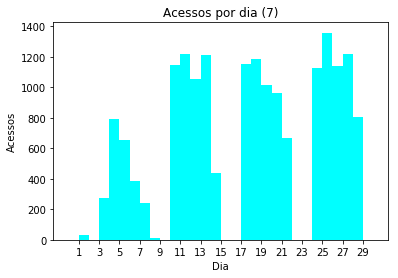

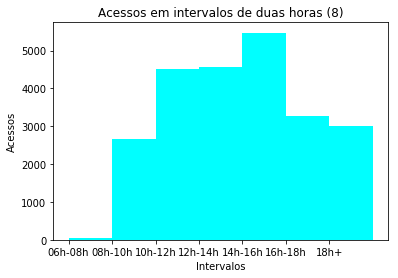

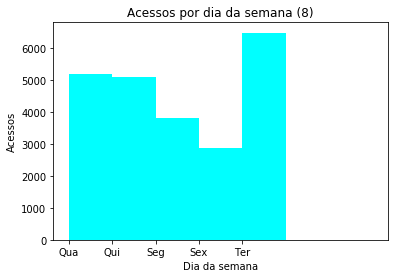

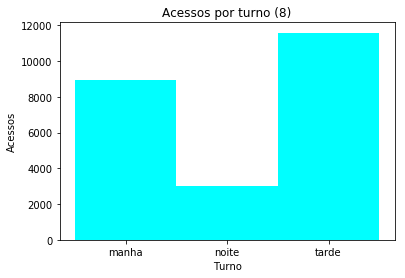

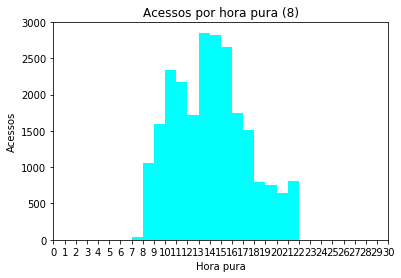

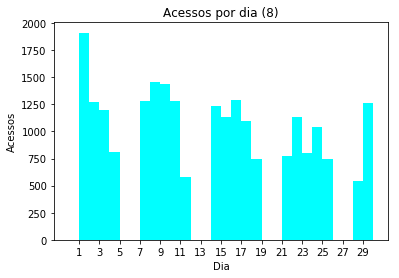

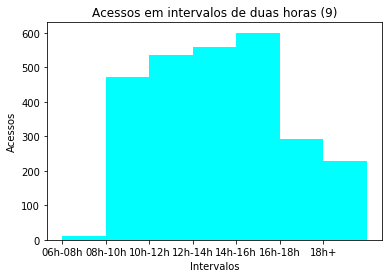

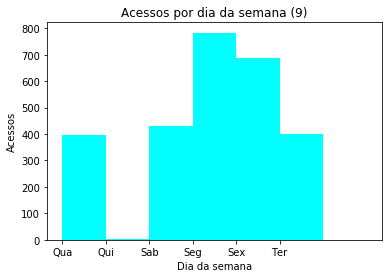

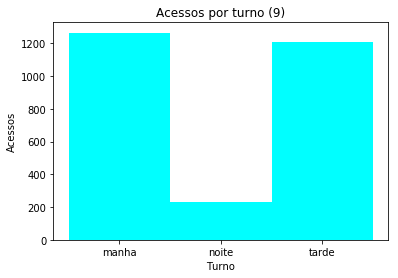

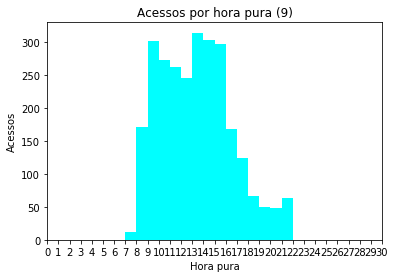

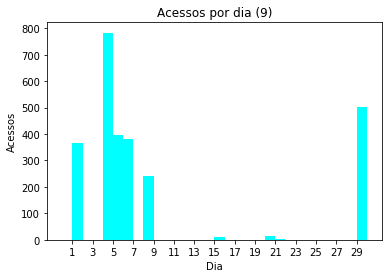

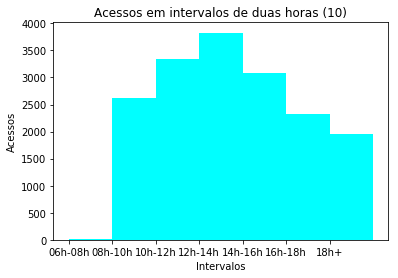

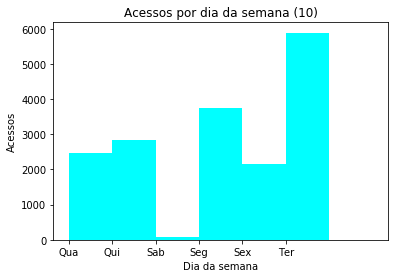

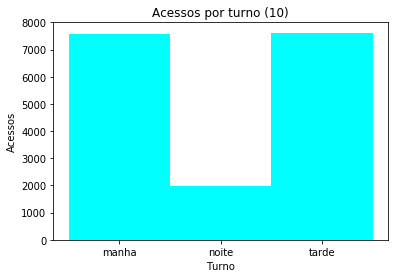

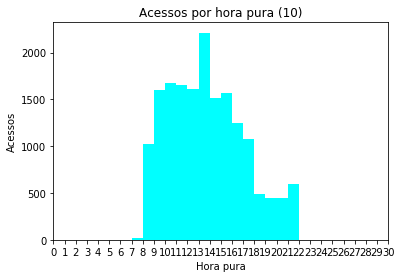

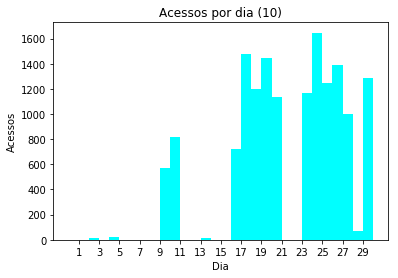

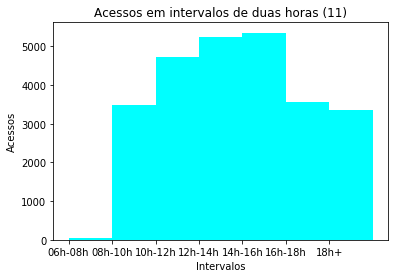

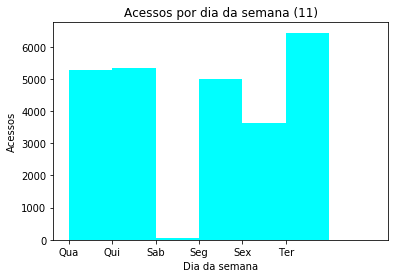

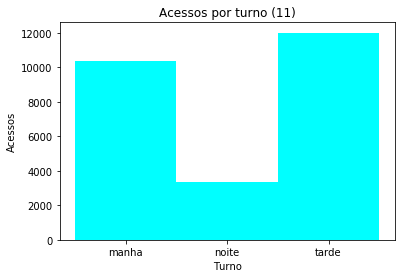

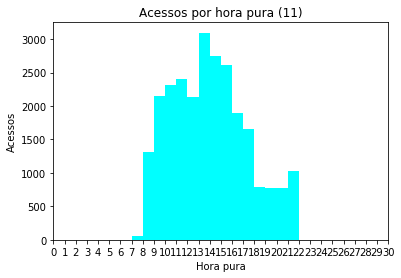

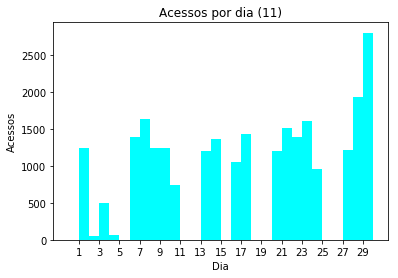

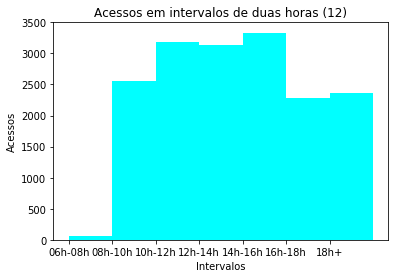

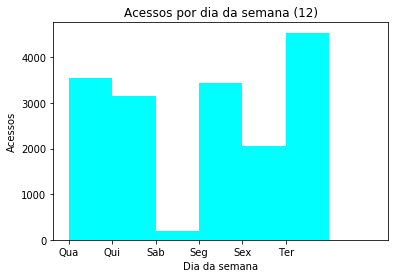

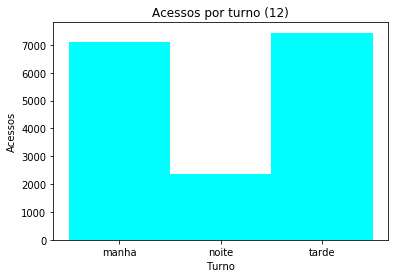

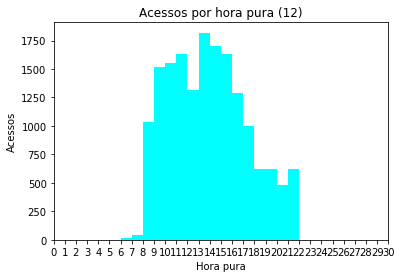

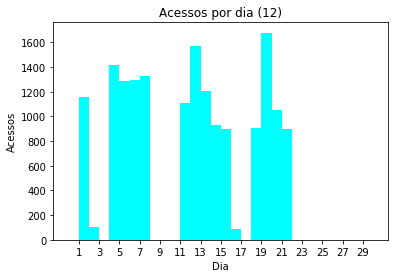

In [45]:
mes_atual = 1

# plots para os meses de janeiro a dezembro de 2017 
for mes in range(12):
    # acessos nos intervalos de hora que, geralmente, são destinados às aulas 
    plt.title("Acessos em intervalos de duas horas ("+ str(mes_atual)+")")
    plt.xlabel("Intervalos")
    plt.ylabel("Acessos")
    plt.hist(df2017.loc[df2017["mes"] == mes_atual]["intervalo"], bins = a, color = "cyan")
    plt.show()

    # acessos de domingo a sábado  
    plt.title("Acessos por dia da semana ("+ str(mes_atual)+")")
    plt.xlabel("Dia da semana")
    plt.ylabel("Acessos")
    plt.hist(df2017.loc[df2017["mes"] == mes_atual]["dia_da_semana"], bins = b, color = "cyan")
    plt.show()

    # acessos em cada turno do dia
    plt.title("Acessos por turno ("+ str(mes_atual)+")")
    plt.xlabel("Turno")
    plt.ylabel("Acessos")
    plt.hist(df2017.loc[df2017["mes"] == mes_atual]["turno"], bins = c, color = "cyan",align = "left")
    plt.show()

    # acessos a cada hora
    plt.title("Acessos por hora pura ("+ str(mes_atual)+")")
    plt.xlabel("Hora pura")
    plt.ylabel("Acessos")
    plt.hist(df2017.loc[df2017["mes"] == mes_atual]["hora_pura"], bins = d, color = "cyan")
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.show()

    # acessos de cada dia do mês
    plt.title("Acessos por dia ("+ str(mes_atual)+")")
    plt.xlabel("Dia")
    plt.ylabel("Acessos")
    plt.hist(df2017.loc[df2017["mes"] == mes_atual]["dia"],bins = x, color = "cyan")
    plt.xticks(np.arange(min(x)+1, max(x)+1, 2.0))
    plt.show()
    mes_atual = mes_atual + 1
    
    


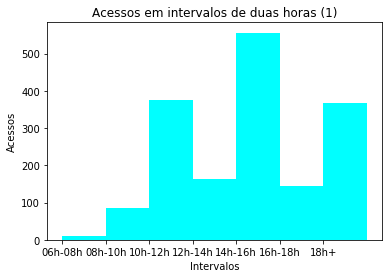

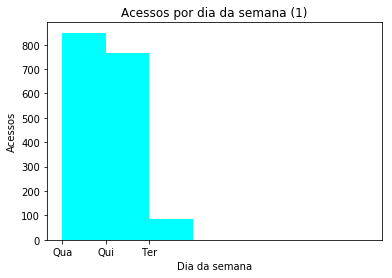

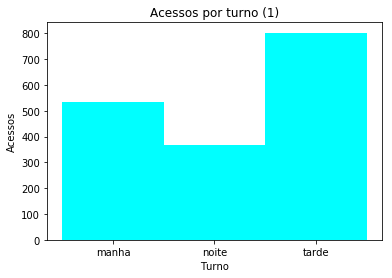

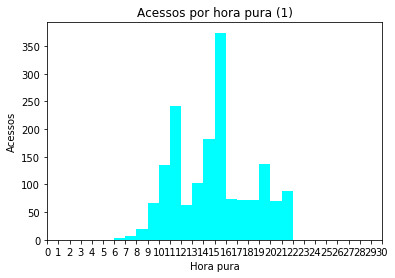

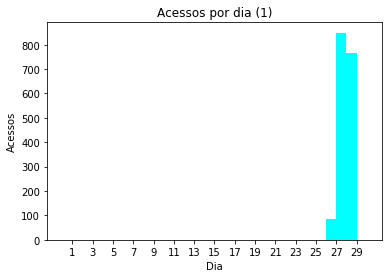

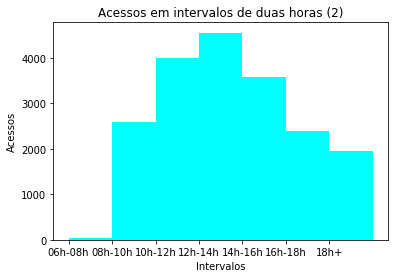

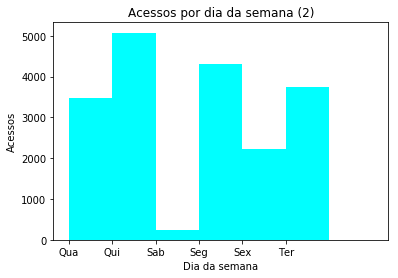

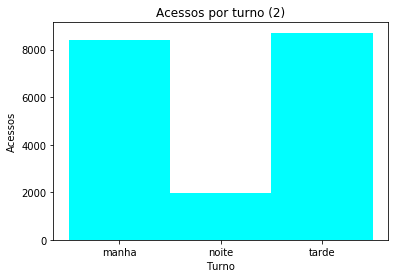

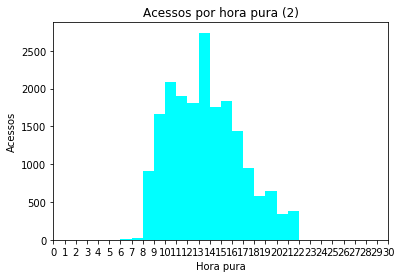

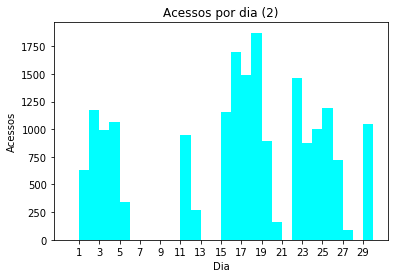

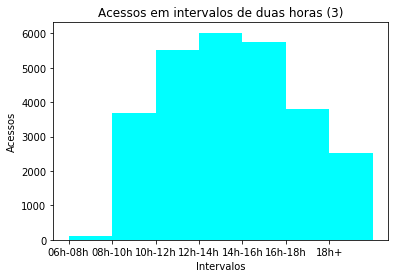

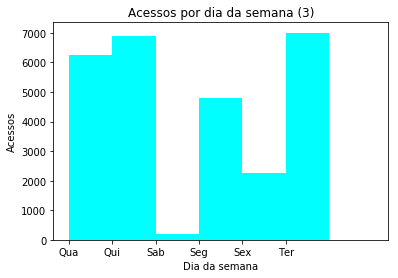

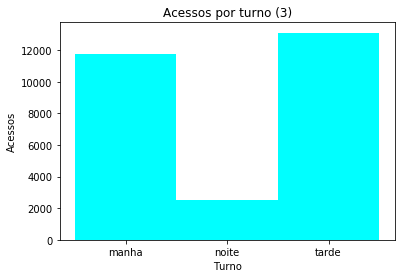

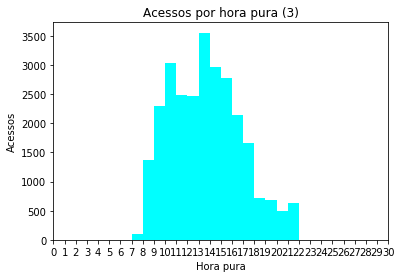

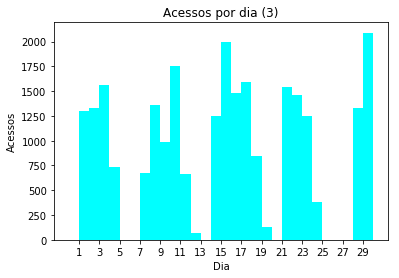

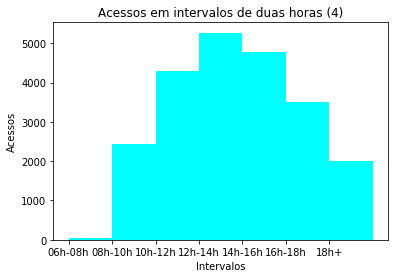

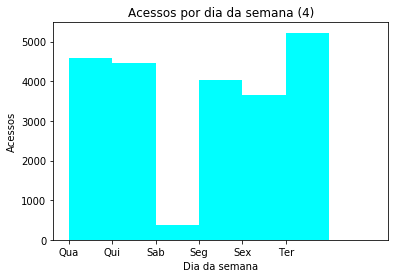

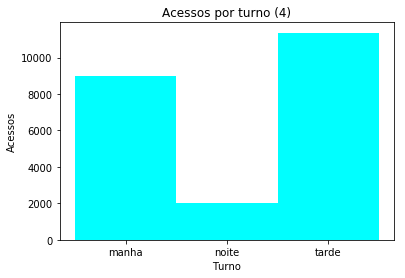

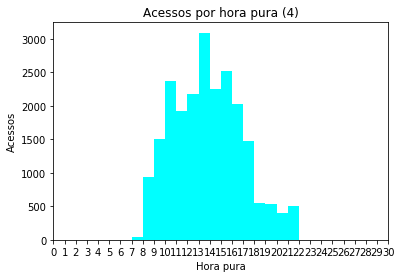

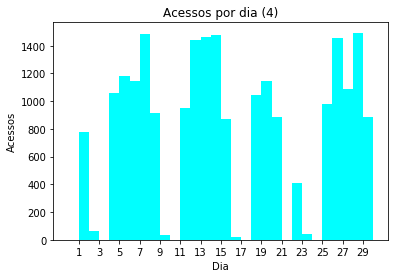

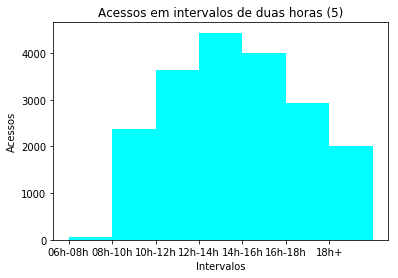

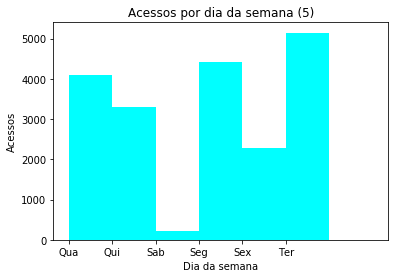

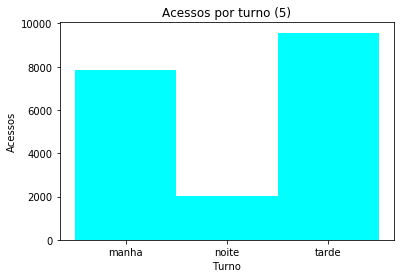

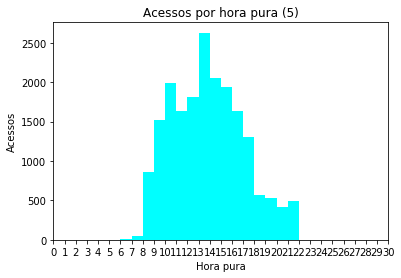

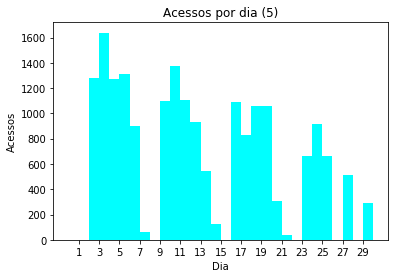

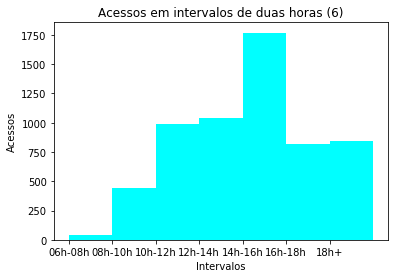

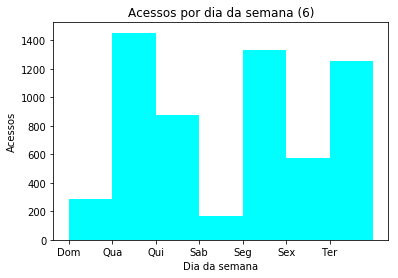

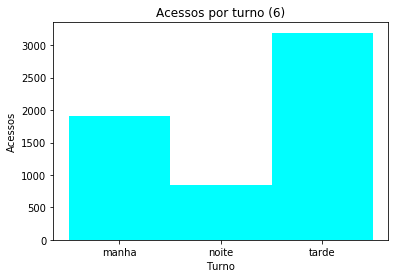

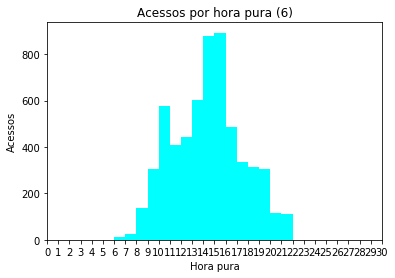

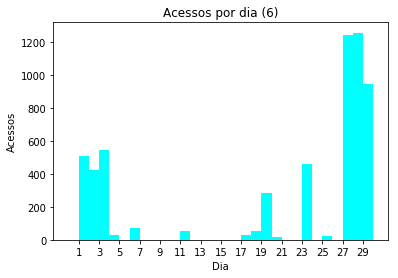

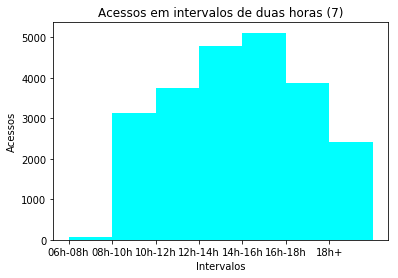

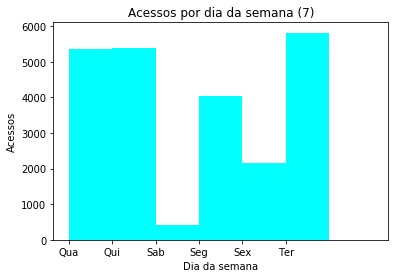

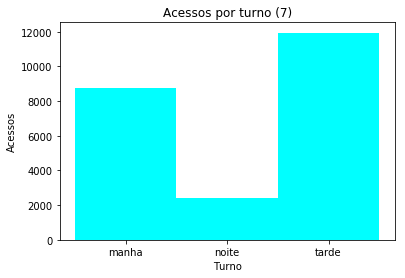

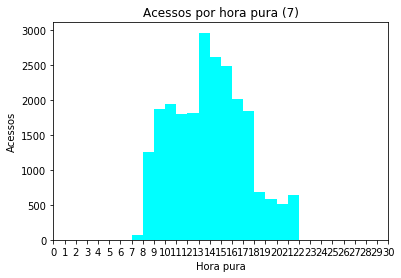

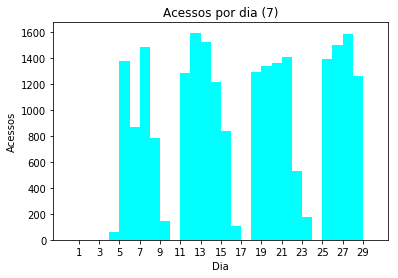

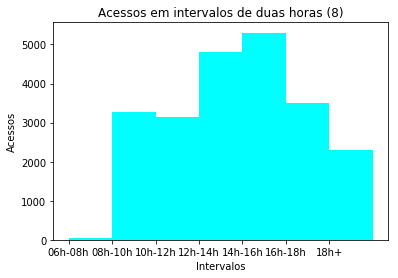

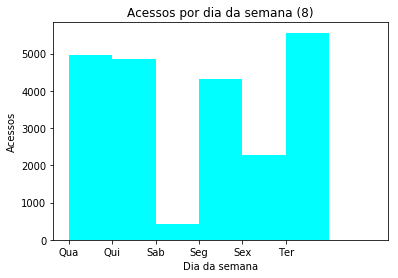

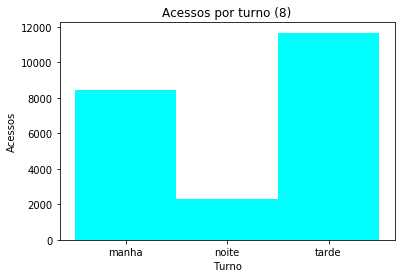

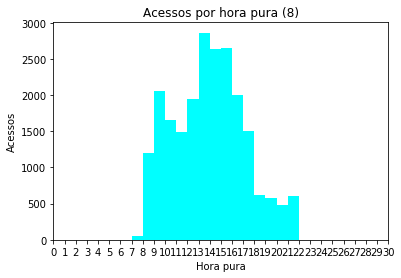

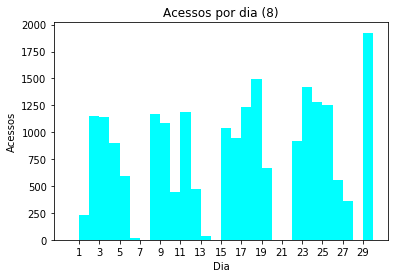

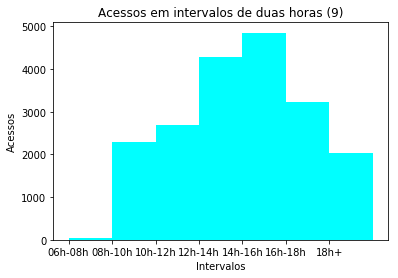

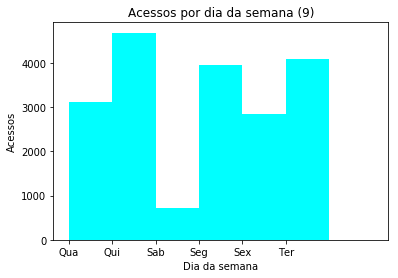

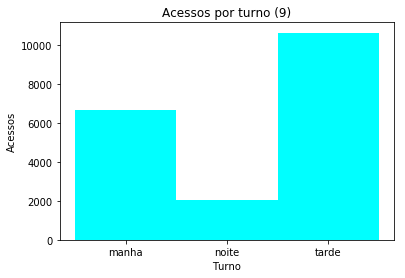

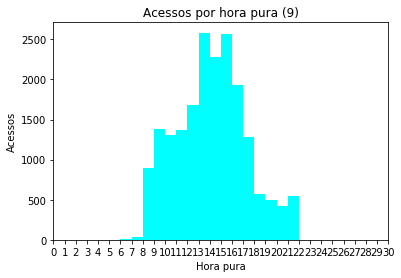

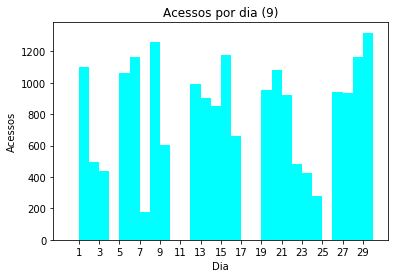

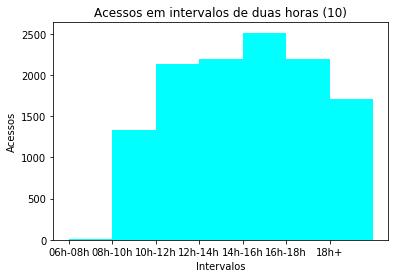

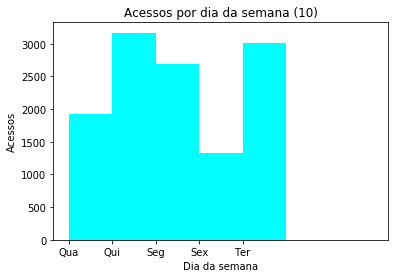

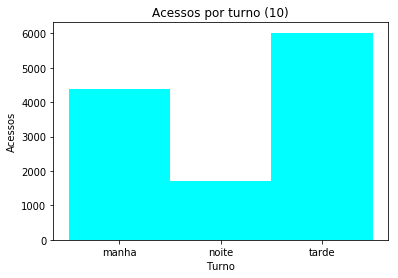

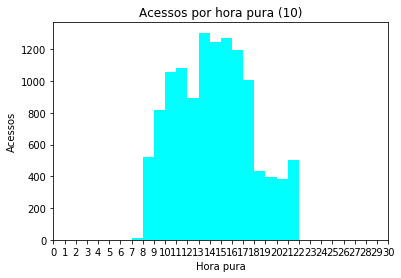

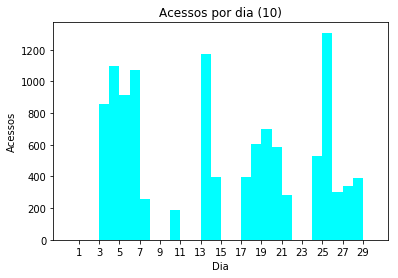

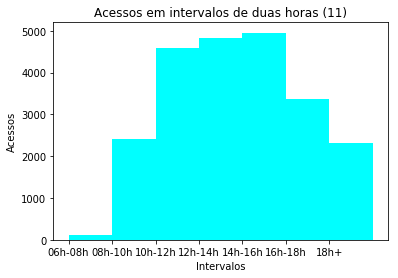

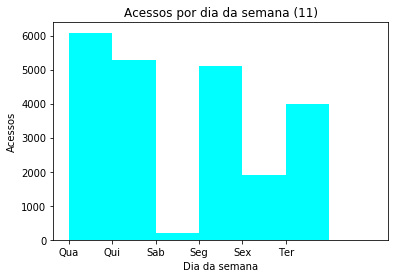

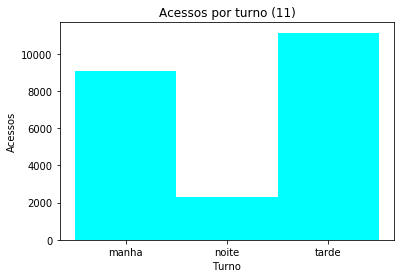

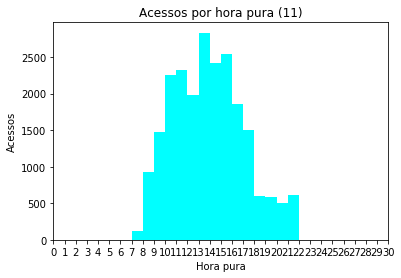

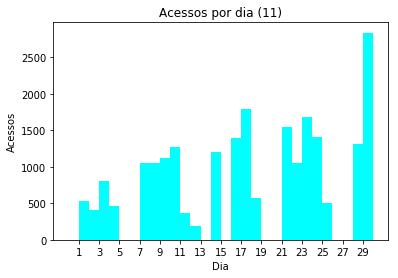

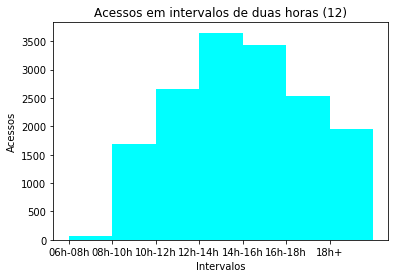

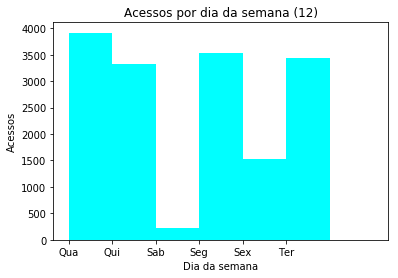

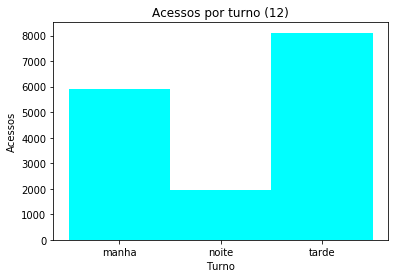

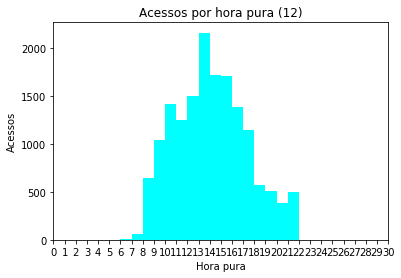

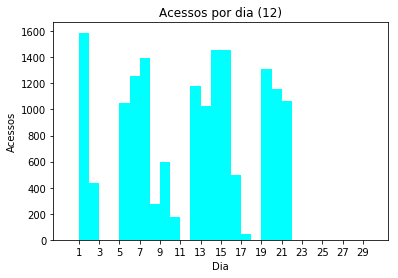

In [46]:
mes_atual = 1

for mes in range(12):
    plt.title("Acessos em intervalos de duas horas ("+ str(mes_atual)+")")
    plt.xlabel("Intervalos")
    plt.ylabel("Acessos")
    plt.hist(df2016.loc[df2016["mes"] == mes_atual]["intervalo"], bins = a, color = "cyan")
    mes_atual = 1
# plots para os meses de janeiro a dezembro de 2016
for mes in range(12):
    # acessos nos intervalos de hora que, geralmente, são destinados às aulas 
    plt.title("Acessos em intervalos de duas horas ("+ str(mes_atual)+")")
    plt.xlabel("Intervalos")
    plt.ylabel("Acessos")
    plt.hist(df2016.loc[df2016["mes"] == mes_atual]["intervalo"], bins = a, color = "cyan")
    plt.show()

    # acessos de domingo a sábado  
    plt.title("Acessos por dia da semana ("+ str(mes_atual)+")")
    plt.xlabel("Dia da semana")
    plt.ylabel("Acessos")
    plt.hist(df2016.loc[df2016["mes"] == mes_atual]["dia_da_semana"], bins = b, color = "cyan")
    plt.show()

    # acessos em cada turno do dia
    plt.title("Acessos por turno ("+ str(mes_atual)+")")
    plt.xlabel("Turno")
    plt.ylabel("Acessos")
    plt.hist(df2016.loc[df2016["mes"] == mes_atual]["turno"], bins = c, color = "cyan",align = "left")
    plt.show()

    # acessos a cada hora
    plt.title("Acessos por hora pura ("+ str(mes_atual)+")")
    plt.xlabel("Hora pura")
    plt.ylabel("Acessos")
    plt.hist(df2016.loc[df2016["mes"] == mes_atual]["hora_pura"], bins = d, color = "cyan")
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.show()

    # acessos de cada dia do mês
    plt.title("Acessos por dia ("+ str(mes_atual)+")")
    plt.xlabel("Dia")
    plt.ylabel("Acessos")
    plt.hist(df2016.loc[df2016["mes"] == mes_atual]["dia"],bins = x, color = "cyan")
    plt.xticks(np.arange(min(x)+1, max(x)+1, 2.0))
    plt.show()
    mes_atual = mes_atual + 1
    
    


# Identificando outliers e plotando kmeans

In [47]:
# Criando um data frame apenas com os acessos
df_acessos = df[["usuario"]].apply(pd.value_counts)
df_acessos.columns = ["acessos"]
df_acessos.head()

acessos
616329888599911591       5198
3952875937242617029      5089
-8964805488632447931     4513
710203151364569887       4428
260012301744219973       4043

In [48]:
# Coletando dados estatísticos do data frame dos acessos
df_acessos.describe()

acessos
count   995.000000
mean    414.371859
std     640.225118
min       1.000000
25%      37.000000
50%     184.000000
75%     503.500000
max    5198.000000

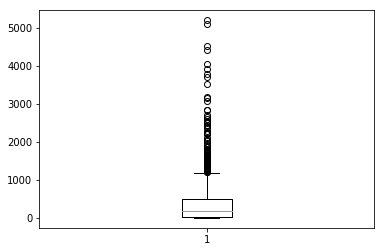

In [49]:
# Plotando o boxplot dos acessos
plt.boxplot(df_acessos["acessos"])
plt.show()

## Identificando possíveis outliers


In [50]:
media_acessos = df_acessos["acessos"].mean()
media_acessos

414.3718592964824

In [51]:
mediana_acessos = df_acessos["acessos"].median()
mediana_acessos

184.0

In [52]:
df_acessos["x-mediana"] = df_acessos["acessos"].apply(lambda x: abs(int(x) - mediana_acessos))
df_acessos.sort_values(by=['x-mediana'])

acessos  x-mediana
-224930710256020865       184        0.0
-6836071898683336601      185        1.0
-2121805090545450681      185        1.0
-4821534548982177369      181        3.0
-1059446735651333741      181        3.0
-4015152259331783011      181        3.0
391057645280711829        180        4.0
8340291719543352165       190        6.0
7879483884156588471       190        6.0
3618336850642240507       177        7.0
-1331438138389589569      177        7.0
2132458211961304329       177        7.0
4660873579999360623       176        8.0
1098658417721117029       193        9.0
-7883246442159867931      175        9.0
6230819687205635179       175        9.0
-938030846939372217       194       10.0
-7099607660546707957      194       10.0
-298930306642039171       195       11.0
6498437600504368023       195       11.0
-8125989049896310121      173       11.0
-2378257679886946085      172       12.0
-2291376239578676013      172       12.0
8408174466357718909       196       12.0
7402762225316078727       196       12.0
-7981733864159693141      196       12.0
-1001715681860578365      197       13.0
-5571270527041432347      198       14.0
5437563291129664891       198       14.0
3254168289682125011       170       14.0
...                       ...        ...
1820137334338048617      2209     2025.0
-8385852833401398067     2215     2031.0
-417527712207776877      2221     2037.0
-5176078910871406265     2240     2056.0
8851394046529841223      2244     2060.0
-4959739203573668493     2287     2103.0
5682070817617030239      2376     2192.0
-3767041185738483901     2418     2234.0
-7526644742279187571     2432     2248.0
-6408941110268116721     2501     2317.0
7995863693106437687      2524     2340.0
3851663166247601983      2531     2347.0
8258181393037226331      2551     2367.0
-5945516227690438481     2596     2412.0
6790375887576350655      2646     2462.0
8599754207183567627      2706     2522.0
-7238394664331719209     2828     2644.0
9211610066823199047      2841     2657.0
7276902838287630379      3066     2882.0
-3829900532284486707     3141     2957.0
-7548620409216467497     3174     2990.0
-7994420641407581993     3532     3348.0
-8029875674051901993     3696     3512.0
-818095743421438535      3788     3604.0
4010185481155475087      3924     3740.0
260012301744219973       4043     3859.0
710203151364569887       4428     4244.0
-8964805488632447931     4513     4329.0
3952875937242617029      5089     4905.0
616329888599911591       5198     5014.0

[995 rows x 2 columns]

In [53]:
mad = df_acessos["x-mediana"].median()
mad

167.0

In [54]:
df_acessos["z_modificado"] = df_acessos["acessos"].apply(lambda x : z_mod(int(x),media_acessos,mad))
df_acessos

acessos  x-mediana  z_modificado
616329888599911591       5198     5014.0     19.320702
3952875937242617029      5089     4905.0     18.880459
-8964805488632447931     4513     4329.0     16.554040
710203151364569887       4428     4244.0     16.210732
260012301744219973       4043     3859.0     14.655747
4010185481155475087      3924     3740.0     14.175115
-818095743421438535      3788     3604.0     13.625821
-8029875674051901993     3696     3512.0     13.254241
-7994420641407581993     3532     3348.0     12.591857
-7548620409216467497     3174     2990.0     11.145923
-3829900532284486707     3141     2957.0     11.012639
7276902838287630379      3066     2882.0     10.709720
9211610066823199047      2841     2657.0      9.800962
-7238394664331719209     2828     2644.0      9.748456
8599754207183567627      2706     2522.0      9.255708
6790375887576350655      2646     2462.0      9.013372
-5945516227690438481     2596     2412.0      8.811426
8258181393037226331      2551     2367.0      8.629675
3851663166247601983      2531     2347.0      8.548896
7995863693106437687      2524     2340.0      8.520624
-6408941110268116721     2501     2317.0      8.427729
-7526644742279187571     2432     2248.0      8.149043
-3767041185738483901     2418     2234.0      8.092498
5682070817617030239      2376     2192.0      7.922863
-4959739203573668493     2287     2103.0      7.563399
8851394046529841223      2244     2060.0      7.389726
-5176078910871406265     2240     2056.0      7.373570
-417527712207776877      2221     2037.0      7.296830
-8385852833401398067     2215     2031.0      7.272597
1820137334338048617      2209     2025.0      7.248363
...                       ...        ...           ...
8163944793101132813         2      182.0      1.665538
1248696463230223603         2      182.0      1.665538
6895593464595132155         2      182.0      1.665538
-3721056414208451701        2      182.0      1.665538
5694048597982381743         2      182.0      1.665538
8093325790259488895         2      182.0      1.665538
2502813621533137413         2      182.0      1.665538
-5432203853161613581        2      182.0      1.665538
-1168028110751775389        1      183.0      1.669577
8627399447655354071         1      183.0      1.669577
-6902006547887714413        1      183.0      1.669577
-6698797551577455505        1      183.0      1.669577
4477622824507611451         1      183.0      1.669577
9008614618843689707         1      183.0      1.669577
2956638425525560475         1      183.0      1.669577
-7855717962119534629        1      183.0      1.669577
2441990193745022491         1      183.0      1.669577
-7118003154910120779        1      183.0      1.669577
-8908254896590706363        1      183.0      1.669577
-2911114223190500809        1      183.0      1.669577
2933926814318580147         1      183.0      1.669577
-5891995412240254797        1      183.0      1.669577
6055680747249145103         1      183.0      1.669577
8016006886981473887         1      183.0      1.669577
4428460762099655883         1      183.0      1.669577
7601450653409176333         1      183.0      1.669577
-5734737182254170941        1      183.0      1.669577
6127608369814369187         1      183.0      1.669577
8063918037889229311         1      183.0      1.669577
2862441311003161235         1      183.0      1.669577

[995 rows x 3 columns]

In [55]:
verificando_outliers = pd.DataFrame()
verificando_outliers["is_outlier"] = df_acessos["z_modificado"] > 3.5
usuarios_outliers = verificando_outliers[verificando_outliers.is_outlier].index.values.tolist()

In [56]:
outliers = df[df["usuario"].isin(usuarios_outliers)].dropna()
outliers.head()


data      hora  maquina               usuario   ano  mes  dia  \
87   27/01/2016  08:30:14  lcc2-21  -5476618318330403419  2016    1   27   
91   27/01/2016  08:40:14  lcc2-21  -5476618318330403419  2016    1   27   
96   27/01/2016  08:50:15  lcc2-21  -5476618318330403419  2016    1   27   
101  27/01/2016  09:00:14  lcc2-21  -5476618318330403419  2016    1   27   
105  27/01/2016  09:00:49  lcc2-27   8851394046529841223  2016    1   27   

    dia_da_semana  hora_pura  turno intervalo  numero_maquina  
87            Qua          8  manha   08h-10h              21  
91            Qua          8  manha   08h-10h              21  
96            Qua          8  manha   08h-10h              21  
101           Qua          9  manha   08h-10h              21  
105           Qua          9  manha   08h-10h              27

In [57]:
outliers.tail()

data      hora  maquina               usuario   ano  mes  dia  \
412279  15/02/2018  14:11:18  lcc2-14  -8964805488632447931  2018    2   15   
412280  15/02/2018  14:11:21  lcc2-13   5732212761568358315  2018    2   15   
412285  15/02/2018  14:20:07  lcc2-23   1244840843434056831  2018    2   15   
412291  15/02/2018  14:20:33  lcc2-32   5682070817617030239  2018    2   15   
412293  15/02/2018  14:20:38  lcc2-19   -304601087665306731  2018    2   15   

       dia_da_semana  hora_pura  turno intervalo  numero_maquina  
412279           Qui         14  tarde   14h-16h              14  
412280           Qui         14  tarde   14h-16h              13  
412285           Qui         14  tarde   14h-16h              23  
412291           Qui         14  tarde   14h-16h              32  
412293           Qui         14  tarde   14h-16h              19

In [58]:
nao_outliers = df[~df["usuario"].isin(usuarios_outliers)].dropna()
nao_outliers.head()

data      hora  maquina              usuario   ano  mes  dia  \
0  26/01/2016  15:21:01  lcc2-28  2396499187178686315  2016    1   26   
1  26/01/2016  15:21:04  lcc2-29  2396499187178686315  2016    1   26   
2  26/01/2016  15:30:39  lcc2-26  8842212669098742675  2016    1   26   
3  26/01/2016  15:30:55  lcc2-39  2396499187178686315  2016    1   26   
4  26/01/2016  15:31:17  lcc2-13  8842212669098742675  2016    1   26   

  dia_da_semana  hora_pura  turno intervalo  numero_maquina  
0           Ter         15  tarde   14h-16h              28  
1           Ter         15  tarde   14h-16h              29  
2           Ter         15  tarde   14h-16h              26  
3           Ter         15  tarde   14h-16h              39  
4           Ter         15  tarde   14h-16h              13

In [59]:
df_sessao = pd.read_csv("../data/logs2Sessoes2.csv", sep=";").drop('Unnamed: 0', axis=1)
df_sessao.head()

data      hora  maquina  sessao              usuario
0  26/01/2016  15:21:01  lcc2-28  opened  2396499187178686315
1  26/01/2016  15:21:04  lcc2-29  opened  2396499187178686315
2  26/01/2016  15:30:55  lcc2-39  opened  2396499187178686315
3  26/01/2016  15:31:20  lcc2-09  opened  2396499187178686315
4  26/01/2016  15:31:23  lcc2-10  opened  2396499187178686315

In [60]:
%run analise.py
df_sessao = ajeitando_df(df_sessao)
df_sessao.head()

data      hora  maquina  sessao              usuario   ano  mes  dia  \
0  26/01/2016  15:21:01  lcc2-28  opened  2396499187178686315  2016    1   26   
1  26/01/2016  15:21:04  lcc2-29  opened  2396499187178686315  2016    1   26   
2  26/01/2016  15:30:55  lcc2-39  opened  2396499187178686315  2016    1   26   
3  26/01/2016  15:31:20  lcc2-09  opened  2396499187178686315  2016    1   26   
4  26/01/2016  15:31:23  lcc2-10  opened  2396499187178686315  2016    1   26   

  dia_da_semana  hora_pura  turno intervalo  numero_maquina  
0           Ter         15  tarde   14h-16h              28  
1           Ter         15  tarde   14h-16h              29  
2           Ter         15  tarde   14h-16h              39  
3           Ter         15  tarde   14h-16h               9  
4           Ter         15  tarde   14h-16h              10

In [61]:
df_sessao["outlier"] = False
mask = df_sessao["usuario"].isin(usuarios_outliers)
column_name = 'outlier'
df_sessao.loc[mask, column_name] = True
df_sessao.head()

data      hora  maquina  sessao              usuario   ano  mes  dia  \
0  26/01/2016  15:21:01  lcc2-28  opened  2396499187178686315  2016    1   26   
1  26/01/2016  15:21:04  lcc2-29  opened  2396499187178686315  2016    1   26   
2  26/01/2016  15:30:55  lcc2-39  opened  2396499187178686315  2016    1   26   
3  26/01/2016  15:31:20  lcc2-09  opened  2396499187178686315  2016    1   26   
4  26/01/2016  15:31:23  lcc2-10  opened  2396499187178686315  2016    1   26   

  dia_da_semana  hora_pura  turno intervalo  numero_maquina  outlier  
0           Ter         15  tarde   14h-16h              28    False  
1           Ter         15  tarde   14h-16h              29    False  
2           Ter         15  tarde   14h-16h              39    False  
3           Ter         15  tarde   14h-16h               9    False  
4           Ter         15  tarde   14h-16h              10    False

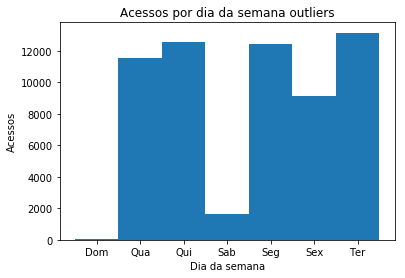

In [62]:
df_sessao_outlier = df_sessao.loc[df_sessao["outlier"] == True]
x = [i for i in range(8)]
plt.title("Acessos por dia da semana outliers")
plt.xlabel("Dia da semana")
plt.ylabel("Acessos")
plt.hist(df_sessao_outlier.dia_da_semana, bins = x,align="left")
plt.show()

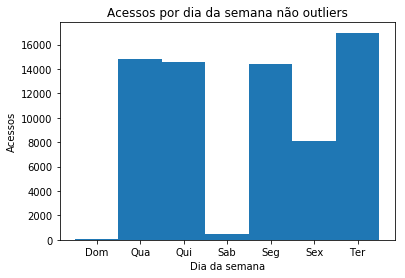

In [63]:
df_sessao_n_outlier = df_sessao.loc[df_sessao["outlier"] == False]
x = [i for i in range(8)]
plt.title("Acessos por dia da semana não outliers")
plt.xlabel("Dia da semana")
plt.ylabel("Acessos")
plt.hist(df_sessao_n_outlier.dia_da_semana, bins = x,align="left")
plt.show()

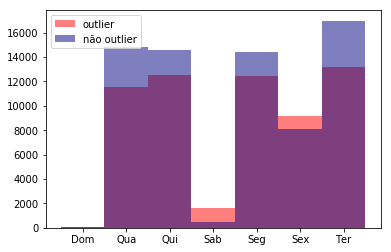

In [64]:
plt.hist(df_sessao_outlier.dia_da_semana, bins = x, alpha = 0.5, label='outlier', color = "red",align = "left")
plt.hist(df_sessao_n_outlier.dia_da_semana, bins = x, alpha = 0.5, label='não outlier', color = "navy",align="left")
plt.legend(loc='upper left')
plt.show()

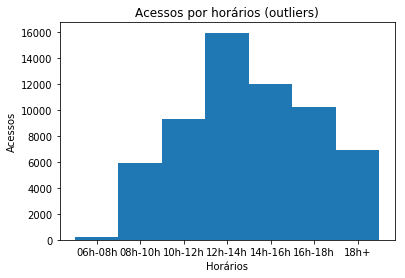

In [65]:
df_sessao_outlier = df_sessao.loc[df_sessao["outlier"] == True]
x = [i for i in range(8)]
plt.title("Acessos por horários (outliers)")
plt.xlabel("Horários")
plt.ylabel("Acessos")
plt.hist(df_sessao_outlier.intervalo, bins = x,align ="left")
plt.show()

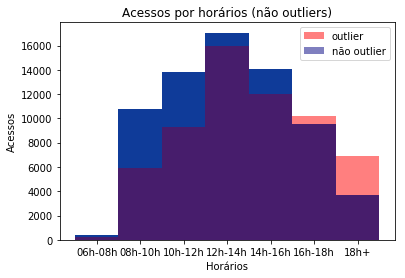

In [66]:
x = [i for i in range(8)]
plt.title("Acessos por horários (não outliers)")
plt.xlabel("Horários")
plt.ylabel("Acessos")
plt.hist(df_sessao_n_outlier.intervalo, bins = x,align ="left")
plt.hist(df_sessao_outlier.intervalo, bins = x, alpha = 0.5, label='outlier', color = "red",align = "left")
plt.hist(df_sessao_n_outlier.intervalo, bins = x, alpha = 0.5, label='não outlier', color = "navy",align="left")
plt.legend(loc='upper right')
plt.show()

In [67]:
from datetime import datetime
df_sessao_outlier["duracao"] = ""
formato = "%H:%M:%S"
data_anterior = ""
maquina_anterior = ""
sessao_anterior = ""
hora_anterior = ""
usuario_anterior = ""

for index, logs in df_sessao_outlier.iterrows():
    if sessao_anterior == "opened":
        if logs["sessao"] == "closed" and logs["usuario"] == usuario_anterior and logs["maquina"] == maquina_anterior and logs["data"] == data_anterior:
            df_sessao_outlier.at[index, "duracao"] = (datetime.strptime(logs["hora"],formato) - (datetime.strptime(hora_anterior,formato)))
    if logs["sessao"] == "opened":
        sessao_anterior = "opened"
        data_anterior = logs["data"]
        maquina_anterior = logs["maquina"]
        hora_anterior = logs["hora"]
        usuario_anterior = logs["usuario"]
    else:
        sessao_anterior = "closed"
        data_anterior = ""
        maquina_anterior = ""
        sessao_anterior = ""
        hora_anterior = ""
        usuario_anterior = ""

/home/livia.cavalcanti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
df_duracao_sessao_outlier = df_sessao_outlier[df_sessao_outlier.duracao != ""].drop(["sessao", "hora"], axis = 1).sort_values(by='duracao')
df_duracao_sessao_outlier.head()

data  maquina               usuario   ano  mes  dia  \
56834  16/03/2016  lcc2-01    260012301744219973  2016    3   16   
65646  08/08/2016  lcc2-12   5772359113678627871  2016    8    8   
5075   08/11/2016  lcc2-02   6360606073874941599  2016   11    8   
24907  08/11/2016  lcc2-02   6360606073874941599  2016   11    8   
35147  09/05/2016  lcc2-03  -3119048470145123191  2016    5    9   

      dia_da_semana  hora_pura  turno intervalo  numero_maquina  outlier  \
56834           Qua         18  noite      18h+               1     True   
65646           Seg         14  tarde   14h-16h              12     True   
5075            Ter         15  tarde   14h-16h               2     True   
24907           Ter         15  tarde   14h-16h               2     True   
35147           Seg         14  tarde   14h-16h               3     True   

       duracao  
56834  0:00:06  
65646  0:00:08  
5075   0:00:38  
24907  0:00:38  
35147  0:01:05

In [84]:
df_duracao_sessao_outlier.tail()

data  maquina               usuario   ano  mes  dia  \
125876  01/12/2017  lcc2-37   7995863693106437687  2017   12    1   
19999   04/11/2016  lcc2-23  -5476618318330403419  2016   11    4   
97350   08/07/2016  lcc2-16   4936868219300984647  2016    7    8   
72129   11/08/2016  lcc2-22  -3829900532284486707  2016    8   11   
104356  03/04/2017  lcc2-05   7374745637866236271  2017    4    3   

       dia_da_semana  hora_pura  turno intervalo  numero_maquina  outlier  \
125876           Sex         22  noite      18h+              37     True   
19999            Sex         22  noite      18h+              23     True   
97350            Sex         22  noite      18h+              16     True   
72129            Qui         22  noite      18h+              22     True   
104356           Seg         22  noite      18h+               5     True   

         duracao  
125876  14:10:01  
19999   14:10:01  
97350   14:26:29  
72129   14:30:00  
104356  15:47:32

In [69]:
df_sessao_n_outlier["duracao"] = ""
formato = "%H:%M:%S"
data_anterior = ""
maquina_anterior = ""
sessao_anterior = ""
hora_anterior = ""
usuario_anterior = ""

for index, logs in df_sessao_n_outlier.iterrows():
    if sessao_anterior == "opened":
        if logs["sessao"] == "closed" and logs["usuario"] == usuario_anterior and logs["maquina"] == maquina_anterior and logs["data"] == data_anterior:
            df_sessao_n_outlier.at[index, "duracao"] = (datetime.strptime(logs["hora"],formato) - (datetime.strptime(hora_anterior,formato)))
    if logs["sessao"] == "opened":
        sessao_anterior = "opened"
        data_anterior = logs["data"]
        maquina_anterior = logs["maquina"]
        hora_anterior = logs["hora"]
        usuario_anterior = logs["usuario"]
    else:
        sessao_anterior = "closed"
        data_anterior = ""
        maquina_anterior = ""
        sessao_anterior = ""
        hora_anterior = ""
        usuario_anterior = ""


df_duracao_sessao_n_outlier = df_sessao_n_outlier[df_sessao_n_outlier.duracao != ""].drop(["sessao", "hora"], axis = 1)
df_duracao_sessao_n_outlier.head()

/home/livia.cavalcanti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


data  maquina              usuario   ano  mes  dia dia_da_semana  \
7    26/01/2016  lcc2-05  2396499187178686315  2016    1   26           Ter   
10   26/01/2016  lcc2-05  2396499187178686315  2016    1   26           Ter   
85   27/01/2016  lcc2-01  2396499187178686315  2016    1   27           Qua   
87   22/03/2016  lcc2-16  2396499187178686315  2016    3   22           Ter   
397  27/01/2016  lcc2-33  2164384666269025751  2016    1   27           Qua   

     hora_pura  turno intervalo  numero_maquina  outlier  duracao  
7           15  tarde   14h-16h               5    False  0:09:54  
10          16  tarde   16h-18h               5    False  0:10:00  
85          11  manha   10h-12h               1    False  2:49:59  
87          14  tarde   14h-16h              16    False  0:10:00  
397          9  manha   08h-10h              33    False  0:49:59

In [81]:
df_duracao_sessao_n_outlier = df_duracao_sessao_n_outlier.sort_values(by='duracao')
df_duracao_sessao_n_outlier.head()

data  maquina               usuario   ano  mes  dia  \
2217    28/01/2016  lcc2-15  -7258716506085809707  2016    1   28   
7251    15/03/2016  lcc2-19   4447365589637111171  2016    3   15   
43378   17/10/2016  lcc2-05   6581201415847811223  2016   10   17   
103582  27/07/2016  lcc2-40  -7446963053336319563  2016    7   27   
87938   11/08/2016  lcc2-03  -1442416312388872333  2016    8   11   

       dia_da_semana  hora_pura  turno intervalo  numero_maquina  outlier  \
2217             Qui         12  manha   12h-14h              15    False   
7251             Ter         14  tarde   14h-16h              19    False   
43378            Seg         14  tarde   14h-16h               5    False   
103582           Qua         16  tarde   16h-18h              40    False   
87938            Qui          9  manha   08h-10h               3    False   

        duracao  
2217    0:00:00  
7251    0:00:00  
43378   0:00:03  
103582  0:00:16  
87938   0:00:36

In [82]:
df_duracao_sessao_n_outlier.tail()

data  maquina               usuario   ano  mes  dia  \
38948   25/02/2016  lcc2-29   2710164216291524419  2016    2   25   
19083   25/02/2016  lcc2-29   2710164216291524419  2016    2   25   
49946   17/02/2016  lcc2-32  -3403495471797043903  2016    2   17   
129465  20/12/2017  lcc2-25  -3025686649526376109  2017   12   20   
129406  02/12/2017  lcc2-03  -6356610120759153725  2017   12    2   

       dia_da_semana  hora_pura  turno intervalo  numero_maquina  outlier  \
38948            Qui         22  noite      18h+              29    False   
19083            Qui         22  noite      18h+              29    False   
49946            Qua         22  noite      18h+              32    False   
129465           Qua         22  noite      18h+              25    False   
129406           Sab         22  noite      18h+               3    False   

         duracao  
38948   15:49:55  
19083   15:49:55  
49946   15:49:58  
129465  15:49:59  
129406  17:30:04

# KMeans

In [70]:
df_acessos = df[["usuario","intervalo"]]
df_acessos_horarios = (df_acessos.groupby(["usuario","intervalo"]).size()).unstack().fillna(0)
X = df_acessos_horarios.values
y = X
%store df_acessos_horarios

Stored 'df_acessos_horarios' (DataFrame)


In [71]:
%R -i df

ERROR:root:Line magic function `%R` not found.
